## Step 17: Human single-cell rebuttal reanalysis

After we voiced our concerns that the cluster labeled as epigenetic memory astrocytes by Lee et al in their reanalysis of the Absinta et al and Schirmer et al datasets included non-astrocyte cell contamination and signs of low quality nuclei or empty droplets, the authors of Lee et al responded with a rebuttal. This script will evaluate points made by the authors' rebuttal.

In [1]:
library(Seurat)
library(readxl)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(dplyr)
library(Nebulosa)
library(viridis)
library(presto)
library(ggrepel)
library(ggrastr)
library(cowplot)
library(gridExtra)
library(ComplexHeatmap)
library(grid)
library(svglite)
library(IRdisplay)

setwd('..') # changing working directory to 'EpiMemAstros' folder

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: patchwork

Loading required package: viridisLite

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


The following object is masked from ‘package:ggpubr’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconduct

First, load the Seurat object provided to us by the authors from their rebuttal analysis.

In [2]:
human_rebuttal <- readRDS('inputs/zenodo/rebuttal/Human_Astrocytes_final.rds')
human_rebuttal

An object of class Seurat 
22243 features across 11031 samples within 2 assays 
Active assay: RNA (20243 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, tsne, umap

Next, load the Seurat object from our analysis in the Step 14 notebook. Notably, this object is identical to the Seurat object originally provided to us by the authors of Lee et al in our earlier correspondence, with the exception of a few added metadata slots from our analysis.

In [3]:
human <- readRDS('outputs/combined_human_final_seurat_object.rds')
human

An object of class Seurat 
91241 features across 16276 samples within 2 assays 
Active assay: RNA (61992 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: SCT
 3 dimensional reductions calculated: pca, harmony, umap

It looks like the original Seurat object and the object provided by the authors from their rebuttal have differing dimensions. The rebuttal object has fewer nuclei, and fewer features (genes). Let's check just how many genes are present in both objects.

In [4]:
rebuttal_genes <- rownames(human_rebuttal[['RNA']])
original_genes <- rownames(human[['RNA']])
print(length(rebuttal_genes))
print(length(original_genes))

[1] 20243
[1] 61992


It looks like the authors' rebuttal object contains only 1/3 of the genes originally present in the Seurat object they shared with us in our earlier correspondence. Let's check whether the lost genes overlap with any of the genes in the epigenetic memory astrocyte signatures or with select cell type marker genes we highlighted in our earlier analysis.

First load our human ortholog FIND-seq gene signature, which we produced in the Step 14 script using the orthogene package to convert the mouse gene names in the original FIND-seq signature to one-to-one human orthologs. 

In [5]:
findseq <- readRDS('outputs/human_findseq_signature.rds')
findseq

[1] "ABO"       "ACADM"     "ACAP2"     "ACOD1"     "ACOX3"     "ACTB"     
  [7] "ADAM22"    "ADIPOR1"   "ADRB2"     "AGPAT5"    "AIP"       "AKR1A1"   
 [13] "ALDOA"     "ALPK1"     "ANKRD44"   "AP1S3"     "APOBEC3H"  "APOE"     
 [19] "ARHGEF1"   "ARL5C"     "ARPC2"     "ATF3"      "ATF4"      "ATP1B1"   
 [25] "ATP2A2"    "ATP2C1"    "ATP5MJ"    "ATP6V0B"   "ATP6V0C"   "ATP6V1E1" 
 [31] "ATRX"      "ATXN1"     "B2M"       "BAZ1B"     "C6orf62"   "BCLAF1"   
 [37] "BHLHE40"   "BICRAL"    "BLNK"      "BMF"       "BORCS7"    "BRD2"     
 [43] "BRD4"      "BRMS1L"    "BSG"       "BTG1"      "BTG2"      "BZW1"     
 [49] "C1QA"      "C1QB"      "C1QC"      "C3"        "CALR"      "CARS2"    
 [55] "CCAR1"     "CCDC88C"   "CCL8"      "CCND3"     "CCNL1"     "CCT5"     
 [61] "CD164"     "CD28"      "CD53"      "CD74"      "CD81"      "CD83"     
 [67] "CD9"       "CDV3"      "CEP170"    "CEP85"     "CEPT1"     "CFL1"     
 [73] "CHD2"      "CHD9"      "CHEK2"     "CHPT1"     "CHURC1"    "CIAPIN1"  
 [79] "CKAP5"     "CLEC6A"    "CLEC7A"    "CLIC1"     "CLK1"      "CNBP"     
 [85] "COMT"      "COPE"      "COPS4"     "COX14"     "COX17"     "COX4I1"   
 [91] "COX7A2"    "CREB5"     "CREBBP"    "CSF1R"     "CSF2RB"    "CST3"     
 [97] "CTC1"      "CTSA"      "CTSB"      "CTSD"      "CTSH"      "CTSS"     
[103] "CTSZ"      "CUX1"      "CUX2"      "CX3CR1"    "CXCL16"    "CXCL3"    
[109] "CYB5A"     "CYB5R4"    "CYBA"      "CYBB"      "DCAF8"     "DDX3X"    
[115] "DDX5"      "DHRS3"     "DHX36"     "DIABLO"    "DNAJB14"   "DOCK10"   
[121] "DOCK8"     "DPM1"      "DPP4"      "DPPA2"     "DPYSL2"    "DUSP1"    
[127] "DUSP11"    "DUSP6"     "EAPP"      "ECI2"      "EEF1B2"    "EEF2"     
[133] "EGR1"      "EIF1"      "EIF2S2"    "EIF3I"     "EIF4A1"    "EIF4G2"   
[139] "ELAVL1"    "ELL2"      "ELMO1"     "EMB"       "ENPP2"     "EPB41L2"  
[145] "ESYT2"     "ETV6"      "F11R"      "FAM210B"   "FAS"       "FAU"      
[151] "FCHSD2"    "FGFR1OP2"  "FHL3"      "FKBP15"    "FNBP1"     "FNDC3B"   
[157] "FOS"       "FOSB"      "FRMD4A"    "FRRS1"     "FTH1"      "FTL"      
[163] "FUNDC2"    "GABPB2"    "GAPDH"     "GAS7"      "GIMAP6"    "GLUL"     
[169] "GNAS"      "GPI"       "GRAMD1A"   "GRN"       "GSAP"      "GSK3B"    
[175] "GTPBP4"    "H3-3B"     "HADHB"     "HCK"       "HDC"       "HERC4"    
[181] "HEXB"      "HMGB2"     "HNRNPA2B1" "HNRNPK"    "HNRNPU"    "HSF2"     
[187] "HSP90AB1"  "HSP90B1"   "HSPA13"    "HSPA5"     "HSPA8"     "HUWE1"    
[193] "ICAM1"     "IFRD1"     "IGF1R"     "IKZF2"     "IL1A"      "IL1B"     
[199] "IL1R2"     "INO80E"    "IQGAP1"    "IRF1"      "ITGB2"     "IWS1"     
[205] "JAK2"      "JARID2"    "JKAMP"     "JUN"       "JUNB"      "KCTD3"    
[211] "KDM6B"     "KIF5B"     "KLF6"      "KLRG1"     "KMT2C"     "KMT2E"    
[217] "LAIR1"     "LAPTM5"    "LARS2"     "LBH"       "LDLRAP1"   "LETM2"    
[223] "LGALS8"    "LGMN"      "LIPA"      "LIPE"      "LITAF"     "LRWD1"    
[229] "LUC7L2"    "LY6S"      "LY6E"      "LY86"      "MALT1"     "MAP3K4"   
[235] "MARCKS"    "MCL1"      "MCM3AP"    "MEF2A"     "METTL25"   "MGAT4A"   
[241] "MRPL33"    "MRPS10"    "MSRB1"     "MT-ATP6"   "MT-ATP8"   "MT-CO1"   
[247] "MT-CO2"    "MT-CO3"    "MT-CYB"    "MT-ND1"    "MT-ND2"    "MT-ND3"   
[253] "MT-ND4"    "MT-ND5"    "MT-ND6"    "MTMR3"     "MXD1"      "MYD88"    
[259] "MYL6"      "MYO9B"     "NAGK"      "NAP1L1"    "NAV2"      "NAV3"     
[265] "NDUFB8"    "NDUFC1"    "NEK6"      "NFKBIA"    "NFKBIZ"    "NIPBL"    
[271] "NKAIN2"    "NMT2"      "NONO"      "NOP58"     "NPEPPS"    "NPTN"     
[277] "NRP2"      "NRXN2"     "NSRP1"     "NUCB1"     "NUDT5"     "NUP98"    
[283] "NXF1"      "OCIAD1"    "OGDH"      "OGT"       "OSM"       "P4HB"     
[289] "PACS1"     "PAM"       "PARVB"     "PCIF1"     "PDE6A"     "PDGFB"    
[295] "PEA15"     "PFDN2"     "PFKFB4"    "PFN1"      "PGD"       "PHKG1"    
[301] "PHYKPL"    "PICALM"    "PIK3CD"    "PIK3CG"    "PIKFYVE"   "PIM1"     
[307] "PKIB"      "PLAUR

Now load the human ortholog corrected up-signature gene set, which we also produced in Step 14. 

In [6]:
up_signature <- readRDS('outputs/human_corrected_up_signature.rds')
up_signature

[1] "IL1B"      "CCRL2"     "S100A9"    "PLEK"      "CSF3R"     "S100A8"   
 [7] "ACOD1"     "CLEC4E"    "IL1R2"     "TNFAIP3"   "TREM1"     "LRG1"     
[13] "CSF2RB"    "CXCR2"     "PTAFR"     "PLAUR"     "IL1RN"     "NLRP3"    
[19] "CYP4F3"    "CD300LF"   "PLBD1"     "CLDN5"     "THEMIS2"   "FGR"      
[25] "SELL"      "SYK"       "IGSF6"     "RAB11FIP1" "GDA"       "ACTG2"    
[31] "SAMSN1"    "SLA"       "CLEC4D"    "ARG2"      "ACKR1"     "MCEMP1"   
[37] "APOC2"     "ATP1A3"    "PIK3R5"    "NCF4"      "CD101"     "SLC15A3"  
[43] "MYO1G"     "MEFV"      "FRAS1"     "ANKRD33B"  "TRIM5"     "ASPRV1"   
[49] "LAMC2"     "PMAIP1"    "FLI1"      "PTPRE"     "NAPSA"     "CLEC6A"   
[55] "EVI2B"     "ACP5"      "FPR1"      "SLC28A2"   "TNFSF14"   "C8orf34"  
[61] "TLR7"      "BTK"       "CCL20"     "ITPR3"     "TNFRSF9"   "TENT5B"   
[67] "TARM1"     "CD69"      "TREML4"    "CCDC88B"   "VDR"

Let's check if there's any overlap between the genes lost in the rebuttal Seurat object and the FIND-seq gene signature.

In [7]:
lost_genes <- setdiff(original_genes, rebuttal_genes)

In [8]:
intersect(lost_genes, findseq)
print(length(intersect(lost_genes, findseq)))

[1] "TUT4"     "SELENOP"  "BICRAL"   "SEM1"     "TMEM250"  "WAPL"    
 [7] "BORCS7"   "ACOD1"    "SELENOS"  "RAB5IF"   "SEPTIN11" "RPS10"   
[13] "DIABLO"   "SPTSSA"   "ATP6V0C"  "ALDOA"    "H3-3B"    "PPAN"    
[19] "CYBB"

[1] 19


19 genes from the FIND-seq signature were lost in the rebuttal Seurat object. What about the corrected up-signature gene set?

In [9]:
intersect(lost_genes, up_signature)
print(length(intersect(lost_genes, up_signature)))

[1] "TENT5B" "ACOD1"  "MCEMP1" "APOC2"

[1] 4


Four genes were lost from this signature. Let's also check whether any genes from the select cell type markers we highlighted in our earlier dot plots from the Step 14 & 15 scripts were lost: 

In [10]:
intersect(lost_genes, c('ALDH1L1', 'SLC1A3', 'SLC1A2', 'GFAP', 'VIM', 'THEMIS', 'SKAP1', 'PTPRC', 'IGKC', 'IGHGP', 'CFAP299', 'TTC6', 'SPAG17', 'MBP', 'MOBP', 'MYRF', 'SYT1', 'SNAP25', 'SLC17A7', 
                       'TUBB', 'TUBB2B', 'TUBB4B', 'PNMA1', 'CD24', 'CD2', 'IGHG3', 'IGHG1', 'TLR2', 'PLXDC2'))

[1] "CFAP299"

We can see that the rebuttal Seurat object provided to us by the authors contains fewer genes than the original object we used for our earlier analyses, and which the authors presumably used for their analyses in the Lee et al manuscript. The lost genes include some genes which were components of the up-signature and FIND-seq derived signature gene sets, as well as a gene we highlighted as indicating ependymal cell type contamination in the original dataset, *CFAP299*. The rationale for removing these genes is unclear, so to avoid losing relevant information we will instead evaluate the rest of the authors' rebuttal analysis using the original count matrix. 

In order to use the full count matrices without removing genes, and in order to compare the original cluster identities to those presented in the authors' rebuttal, we need to match up the cell barcodes present in the original Seurat object with the new rebuttal object provided by the authors. Let's check if the cell barcode names are the same between these objects: 

In [11]:
head(colnames(human))
tail(colnames(human))

[1] "AAACGCTCACAGTCAT-1" "AAACGCTGTTCGGTTA-1" "AAAGAACAGGTAGATT-1"
[4] "AAAGAACTCGTCACCT-1" "AAAGTGAGTGCATCTA-1" "AACCACAAGTCATGAA-1"

[1] "TTTATGCTCGCTAGCG-1_SRR9123052" "TTTCCTCGTCAGAATA-1_SRR9123052"
[3] "TTTGCGCAGTACGACG-1_SRR9123052" "TTTGCGCCACAGGCCT-1_SRR9123052"
[5] "TTTGGTTCACTGTCGG-1_SRR9123052" "TTTGTCAGTCGCGTGT-1_SRR9123052"

In [12]:
head(colnames(human_rebuttal))
tail(colnames(human_rebuttal))

[1] "AAACGCTAGATTGATG-2" "AAACGCTCAGGACTAG-2" "AAAGAACCACCGTACG-2"
[4] "AACAACCCACTTCTCG-2" "AACACACCACTCTCGT-2" "AAGAACATCAGTGGGA-2"

[1] "TTCTCCTTCACCAGGC-1_MS377_A2D2" "TTGCCGTGTAATCACC-1_MS377_A2D2"
[3] "TTTACTGCATCCTTGC-1_MS377_A2D2" "TTTATGCGTCAGAGGT-1_MS377_A2D2"
[5] "TTTGTCACAGCGAACA-1_MS377_A2D2" "TTTGTCAGTCGCCATG-1_MS377_A2D2"

Unfortunately at least some of the cell barcodes are in different formats/contain different identifiers between these data objects. Let's see if we can match up the barcodes by looking at sample metadata.

In [13]:
table(human$sample)


    09_034     09_067      11_69     12_002     12_078     13_015     13_047 
       718        816         57         67       1183       1042       4124 
    14_043 SRR9123032 SRR9123033 SRR9123034 SRR9123035 SRR9123036 SRR9123037 
       204         91        489        366        398         58        278 
SRR9123038 SRR9123039 SRR9123040 SRR9123041 SRR9123042 SRR9123043 SRR9123044 
       380        462        132        319        360        432        597 
SRR9123045 SRR9123046 SRR9123047 SRR9123048 SRR9123049 SRR9123050 SRR9123051 
       677        291        380        465        443        544        209 
SRR9123052 
       694 

In [14]:
table(human_rebuttal$samples)


  09_034_chronic_active_MS_lesion_edge 09_034_chronic_inactive_MS_lesion_edge 
                                   209                                    294 
     09_034_MS_periplaque_white_matter                  09_067_MS_lesion_core 
                                   140                                    673 
                                  1_A4                                   1_A9 
                                   356                                    463 
  12_078_chronic_active_MS_lesion_edge 12_078_chronic_inactive_MS_lesion_edge 
                                   687                                    141 
     12_078_MS_periplaque_white_matter 13_015_chronic_inactive_MS_lesion_edge 
                                   212                                    899 
  13_047_chronic_active_MS_lesion_edge 13_047_chronic_inactive_MS_lesion_edge 
                                  1780                                    142 
                 13_047_MS_lesion_core            1

Unfortunately it looks like some samples have different names between these datasets, and others are split among multiple sample names based on tissue sample annotations. 

Let's check if we might be able to decode cell barcode/sample identity using the barcode suffixes:

In [15]:
unique(gsub('^.*-', '', colnames(human_rebuttal)))
length(unique(gsub('^.*-', '', colnames(human_rebuttal))))

[1] "2"            "11"           "17"           "7"            "1_1_A4"      
 [6] "1_1_A9"       "4"            "12"           "20"           "8"           
[11] "10"           "1"            "3"            "6"            "9"           
[16] "16"           "14"           "1_2_B4"       "1_2_B9"       "1_25G_P3C1"  
[21] "1_3_C4"       "1_371G_A3D3"  "1_5_B5"       "1_5546_BA9"   "1_6_C5"      
[26] "1_7_D5"       "1_7_G10"      "1_8_E5"       "1_8_H10"      "1_MS200_A303"
[31] "1_MS377_A2D2"

[1] 31

In [16]:
unique(gsub('^.*-', '', colnames(human)))
length(unique(gsub('^.*-', '', colnames(human))))

[1] "1"            "3"            "6"            "9"            "16"          
 [6] "2"            "11"           "17"           "4"            "12"          
[11] "20"           "5"            "7"            "18"           "8"           
[16] "10"           "19"           "13"           "14"           "15"          
[21] "1_SRR9123038" "1_SRR9123040" "1_SRR9123039" "1_SRR9123041" "1_SRR9123034"
[26] "1_SRR9123035" "1_SRR9123036" "1_SRR9123037" "1_SRR9123032" "1_SRR9123033"
[31] "1_SRR9123042" "1_SRR9123043" "1_SRR9123045" "1_SRR9123044" "1_SRR9123046"
[36] "1_SRR9123047" "1_SRR9123048" "1_SRR9123049" "1_SRR9123050" "1_SRR9123051"
[41] "1_SRR9123052"

[1] 41

It looks like many of the barcode suffixes differ between these datasets, and there's actually a different number of barcode suffixes as well between the two datasets. This makes it tricky to match the corresponding barcodes between datasets.

Let's check how many cell barcode names match exactly between the data objects:

In [17]:
sum(colnames(human) %in% colnames(human_rebuttal))

[1] 6213

We'll start by assuming all these identical cell barcodes correspond to the same cell between objects. Let's now create new data objects removing the cell barcode columns for which we've already identified a match.

In [18]:
human_unmatched <- human[,!(colnames(human) %in% colnames(human_rebuttal))]

In [19]:
human_unmatched
dim(human_unmatched)

An object of class Seurat 
91241 features across 10063 samples within 2 assays 
Active assay: RNA (61992 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: SCT
 3 dimensional reductions calculated: pca, harmony, umap

[1] 61992 10063

In [20]:
rebuttal_unmatched <- human_rebuttal[,!(colnames(human_rebuttal) %in% colnames(human))]

In [21]:
rebuttal_unmatched
dim(rebuttal_unmatched)

An object of class Seurat 
22243 features across 4818 samples within 2 assays 
Active assay: RNA (20243 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, tsne, umap

[1] 20243  4818

Let's check the metadata of the remaining barcodes to identify what samples remain: 

In [22]:
table(rebuttal_unmatched$samples)


      1_A4       1_A9       2_B4       2_B9   25G_P3C1       3_C4  371G_A3D3 
       356        463        245        217        275        436        319 
      5_B5   5546_BA9       6_C5       7_D5      7_G10       8_E5      8_H10 
       157        217        336        319        276        276        205 
MS200_A303 MS377_A2D2 
       578        143 

In [23]:
table(human$source, human$sample)

                     
                      09_034 09_067 11_69 12_002 12_078 13_015 13_047 14_043
  Absinta et al 2021     718    816    57     67   1183   1042   4124    204
  Schirmer et al 2019      0      0     0      0      0      0      0      0
                     
                      SRR9123032 SRR9123033 SRR9123034 SRR9123035 SRR9123036
  Absinta et al 2021           0          0          0          0          0
  Schirmer et al 2019         91        489        366        398         58
                     
                      SRR9123037 SRR9123038 SRR9123039 SRR9123040 SRR9123041
  Absinta et al 2021           0          0          0          0          0
  Schirmer et al 2019        278        380        462        132        319
                     
                      SRR9123042 SRR9123043 SRR9123044 SRR9123045 SRR9123046
  Absinta et al 2021           0          0          0          0          0
  Schirmer et al 2019        360        432        597        677

The unmatched barcodes in the rebuttal object seem to all be coming from the Schirmer dataset.

We'll try something more complicated now. Because each dataset should contain the same count information (once the lost genes are excluded) for each cell, we should be able to figure out which columns in each dataset matrix correspond to the same cell barcode by matching together identical columns. Let's try this: 

In [24]:
genes_to_include <- rownames(human_rebuttal[['RNA']]$data)

In [25]:
original_data = as.matrix(LayerData(human_unmatched, layer = 'count', features = genes_to_include))
rebuttal_data = as.matrix(LayerData(rebuttal_unmatched, layer = 'count'))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.5 GiB”


In [26]:
dim(original_data)
dim(rebuttal_data)

[1] 20243 10063

[1] 20243  4818

In [27]:
library(future)
library(future.apply)

In [28]:
options(future.globals.maxSize=1250000*1024^2)

In [29]:
# Function to match columns by their data in parallel, ensuring a unique match
match_columns_unique_parallel <- function(matrixA, matrixB) {
  # Ensure both matrices have the same row names
  if(!identical(rownames(matrixA), rownames(matrixB))) {
    stop("Row names do not match between Matrix A and Matrix B.")
  }
  
  # Create an empty vector to store the matching indices
  match_key <- rep(NA, ncol(matrixB))
  
  # Set the plan to use multiple cores for parallel computation
  plan(multicore, workers = 54)  # This activates multicore parallelism
  
  # Define a helper function to process each column
  match_column_function <- function(i) {
    b_column <- matrixB[, i]
    
    # Find columns in Matrix A that match the current column in Matrix B
    matching_columns <- which(apply(matrixA, 2, identical, y = b_column))
    
    # Check if there is exactly one match
    if (length(matching_columns) == 1) {
      return(matching_columns)
    } else if (length(matching_columns) == 0) {
      print(paste("No match found for column", i, "in Matrix B."))
      return(NaN)
    } else {
      print(paste("Multiple matches found for column", i, "in Matrix B."))
      return(NaN)
    }
  }
  
  # Use future_lapply for parallel processing (it will split the task across cores)
  match_results <- future_lapply(1:ncol(matrixB), match_column_function)
  
  # Convert list to a vector
  match_key <- unlist(match_results)
  
  # Return the match key which links columns of Matrix B to Matrix A
  return(match_key)
}

# Example of usage:
# match_key <- match_columns_unique_parallel(matrixA, matrixB)
# print(match_key)  # This will give a vector where each entry is the column index from Matrix A that corresponds to each column in Matrix B


In [30]:
match_key <- match_columns_unique_parallel(original_data, rebuttal_data)

[1] "No match found for column 1 in Matrix B."
[1] "No match found for column 2 in Matrix B."
[1] "No match found for column 3 in Matrix B."
[1] "No match found for column 4 in Matrix B."
[1] "No match found for column 5 in Matrix B."
[1] "No match found for column 6 in Matrix B."
[1] "No match found for column 7 in Matrix B."
[1] "No match found for column 8 in Matrix B."
[1] "No match found for column 9 in Matrix B."
[1] "No match found for column 10 in Matrix B."
[1] "No match found for column 11 in Matrix B."
[1] "No match found for column 12 in Matrix B."
[1] "No match found for column 13 in Matrix B."
[1] "No match found for column 14 in Matrix B."
[1] "No match found for column 15 in Matrix B."
[1] "No match found for column 16 in Matrix B."
[1] "No match found for column 17 in Matrix B."
[1] "No match found for column 18 in Matrix B."
[1] "No match found for column 19 in Matrix B."
[1] "No match found for column 20 in Matrix B."
[1] "No match found for column 21 in Matrix B."
[

In [31]:
table(is.na(match_key))


TRUE 
4818 

It looks like none of the unmatched barcodes have an identical match between our two data objects. This seems to indicate that the count matrices used in the original object shared with us and the object used in the authors' rebuttal analysis were produced/preprocessed differently.

Let's try to narrow down for an individual barcode, what the most likely match is between data objects, by focusing on barcodes only with matching names when excluding barcode suffixes. Let's randomly evaluate barcode #567 in the unmatched rebuttal object:

In [32]:
rebuttal_barcode <- colnames(rebuttal_unmatched[,567])
rebuttal_barcode

[1] "CTGATAGTCTTGACGA-1_1_A9"

We'll strip off the suffix of the barcode and search for any matching names in the original Seurat object:

In [33]:
pattern <- gsub('-1_.*$', '', rebuttal_barcode)

In [34]:
original_barcode <- colnames(human)[grep(pattern, colnames(human))]
original_barcode

[1] "CTGATAGTCTTGACGA-1_SRR9123052"

We found just one match. This is likely the corresponding barcode in the original dataset. Let's check how the counts for each gene differ for this barcode in the original Seurat object versus the authors' rebuttal object:

In [35]:
df = data.frame('original' = original_data[,grep(pattern, colnames(original_data))], 
           'rebuttal' = rebuttal_data[,rebuttal_barcode]) %>% mutate(difference = original-rebuttal)

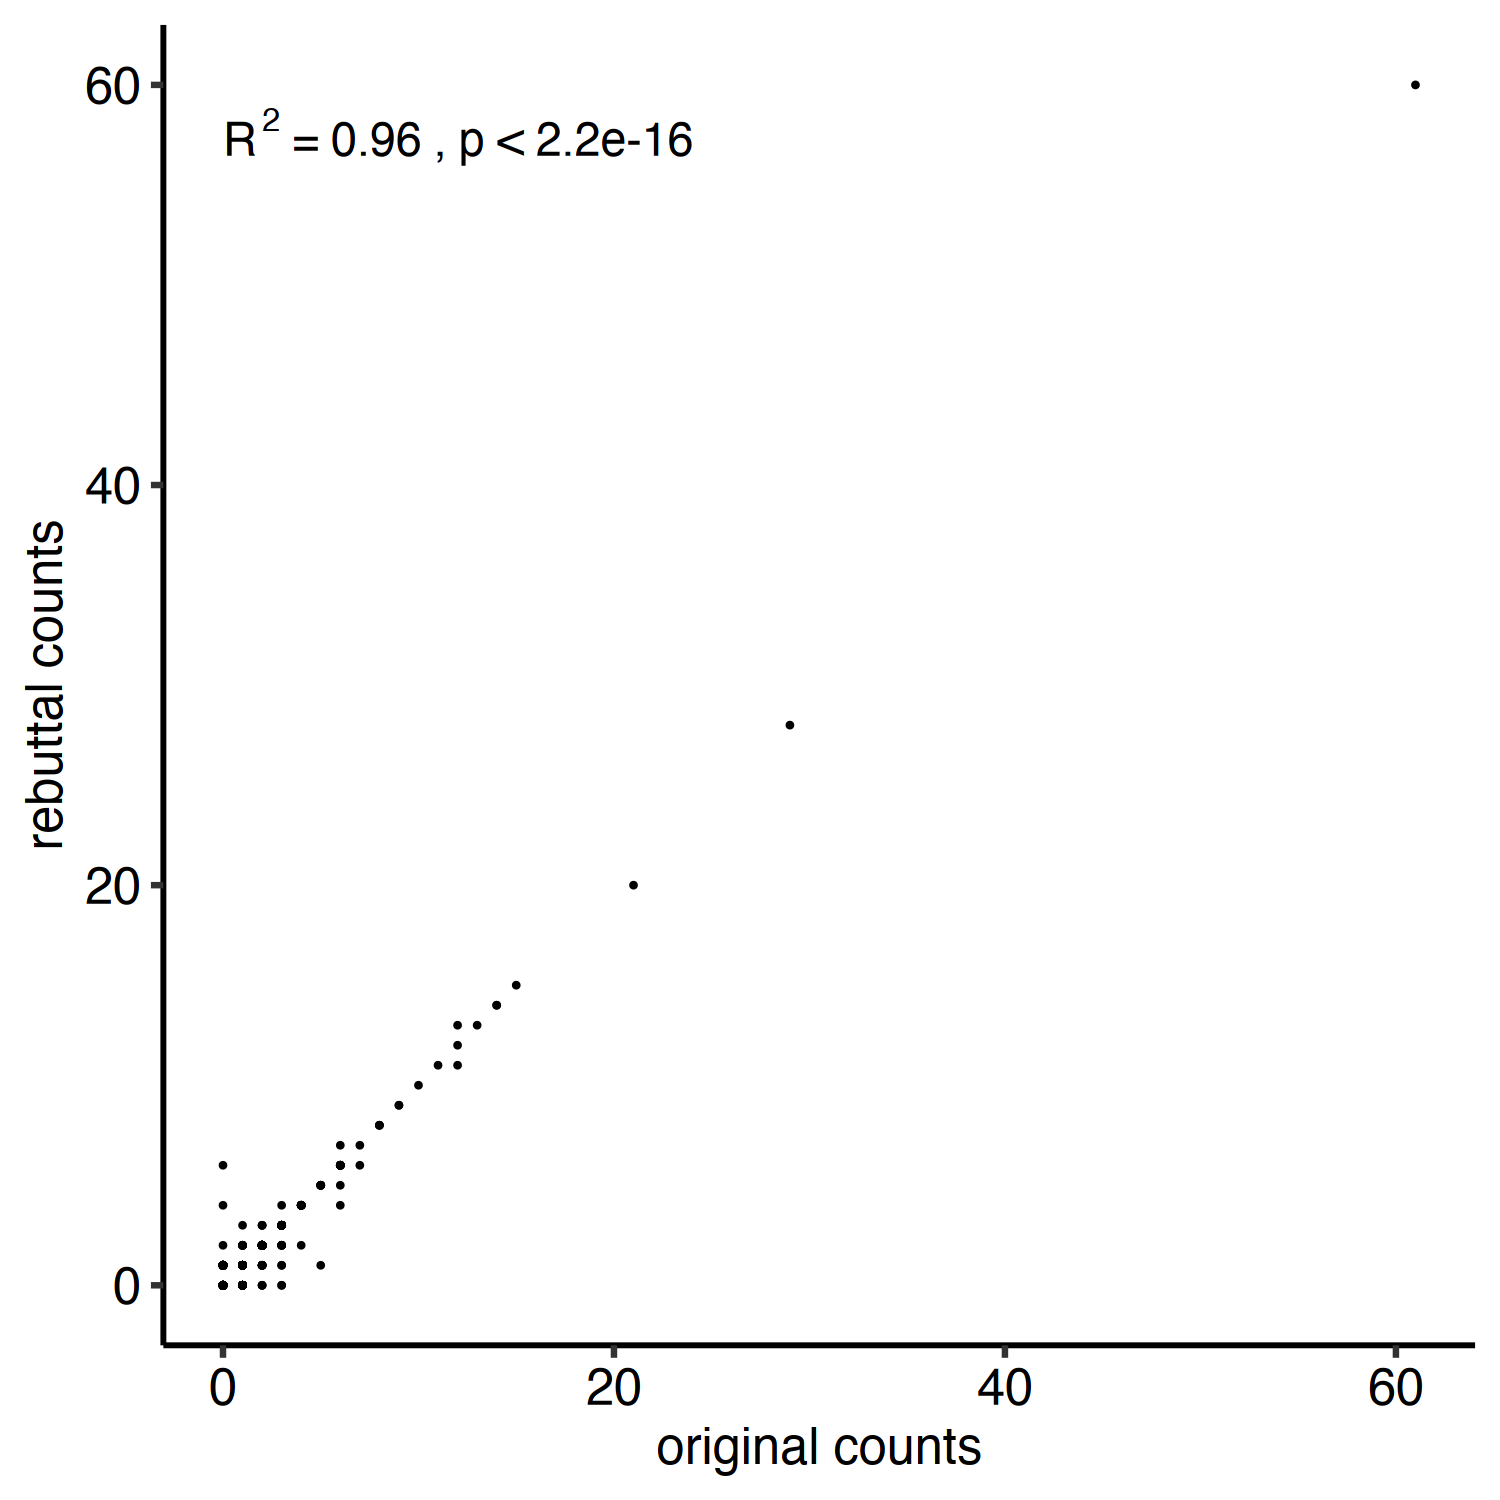

In [36]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300, warn = -1)

ggplot(df, aes(x = original, y = rebuttal)) +
        geom_point(size = 0.1) + 
        stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 0) + 
        labs(x = "original counts", y = 'rebuttal counts') + theme_pubr()

We can see that many genes have similar counts between these objects for this barcode, while some genes have higher counts in the rebuttal object and others have higher counts in the original object. Let's check this for normalized expression as well:

In [37]:
exp_df = data.frame('original' = LayerData(human, layer = 'data', features = genes_to_include, cells = original_barcode),
                  'rebuttal' = LayerData(human_rebuttal, layer = 'data', cells = rebuttal_barcode))
colnames(exp_df) <- c("original", "rebuttal")
exp_df <- exp_df %>% mutate(difference = original-rebuttal) %>% arrange(desc(difference))

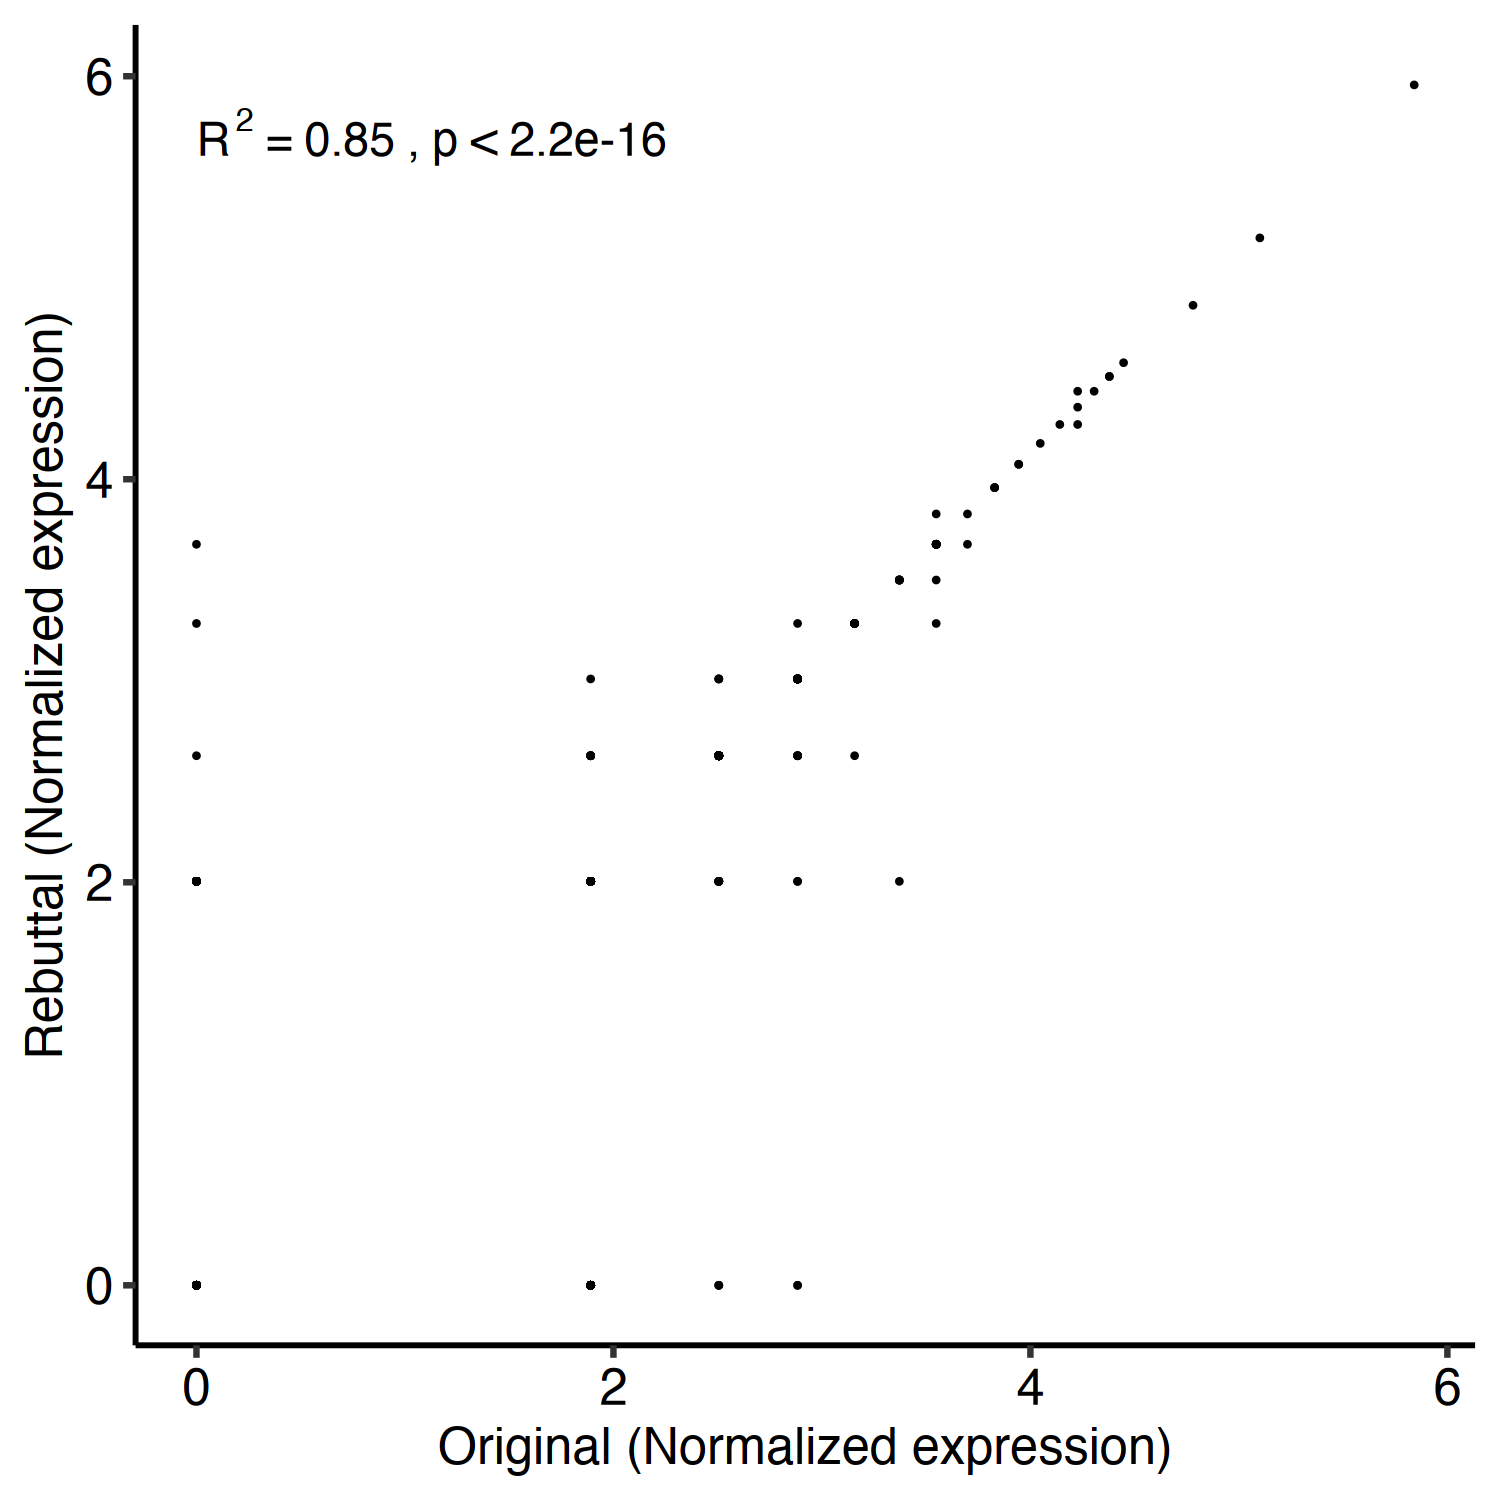

In [38]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300, warn = -1)

ggplot(exp_df, aes(x = original, y = rebuttal)) +
        geom_point(size = 0.1) + 
        stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 0) + 
        labs(x = "Original (Normalized expression)", y = 'Rebuttal (Normalized expression)') + theme_pubr()

We can see that the counts & normalized expression fields between the same barcode in these objects don't seem to match. Let's check this for a barcode from the Absinta et al portion of the combined dataset:

In [39]:
original_barcode <- colnames(human)[colnames(human) %in% colnames(human_rebuttal)][1]
rebuttal_barcode <- original_barcode

In [40]:
exp_df = data.frame('original' = LayerData(human, layer = 'data', features = genes_to_include, cells = original_barcode),
                  'rebuttal' = LayerData(human_rebuttal, layer = 'data', cells = rebuttal_barcode))
colnames(exp_df) <- c("original", "rebuttal")
exp_df <- exp_df %>% mutate(difference = original-rebuttal) %>% arrange(desc(difference))

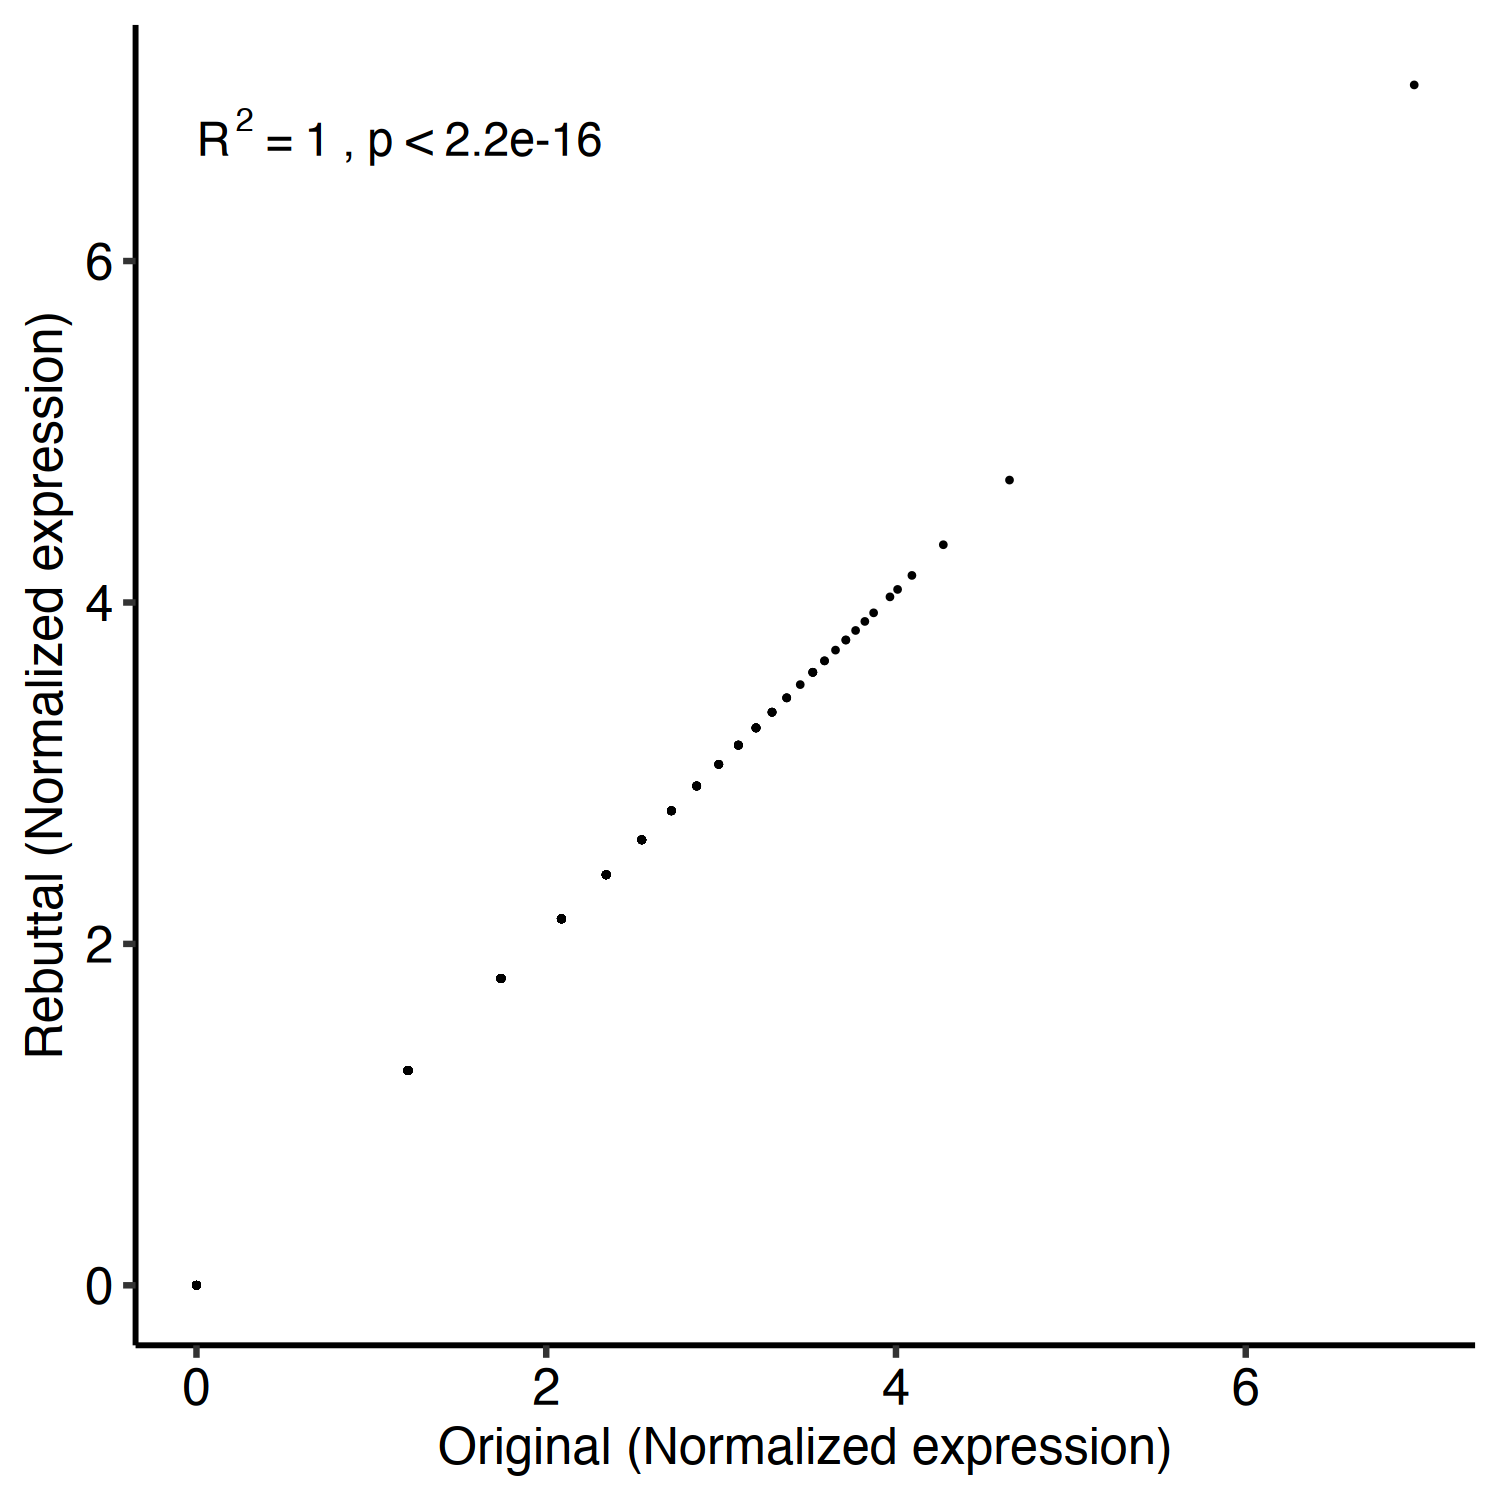

In [41]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300, warn = -1)

ggplot(exp_df, aes(x = original, y = rebuttal)) +
        geom_point(size = 0.1) + 
        stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 0) + 
        labs(x = "Original (Normalized expression)", y = 'Rebuttal (Normalized expression)') + theme_pubr()

In [42]:
exp_df = data.frame('original' = LayerData(human, layer = 'counts', features = genes_to_include, cells = original_barcode),
                  'rebuttal' = LayerData(human_rebuttal, layer = 'counts', cells = rebuttal_barcode))
colnames(exp_df) <- c("original", "rebuttal")
exp_df <- exp_df %>% mutate(difference = original-rebuttal) %>% arrange(desc(difference))

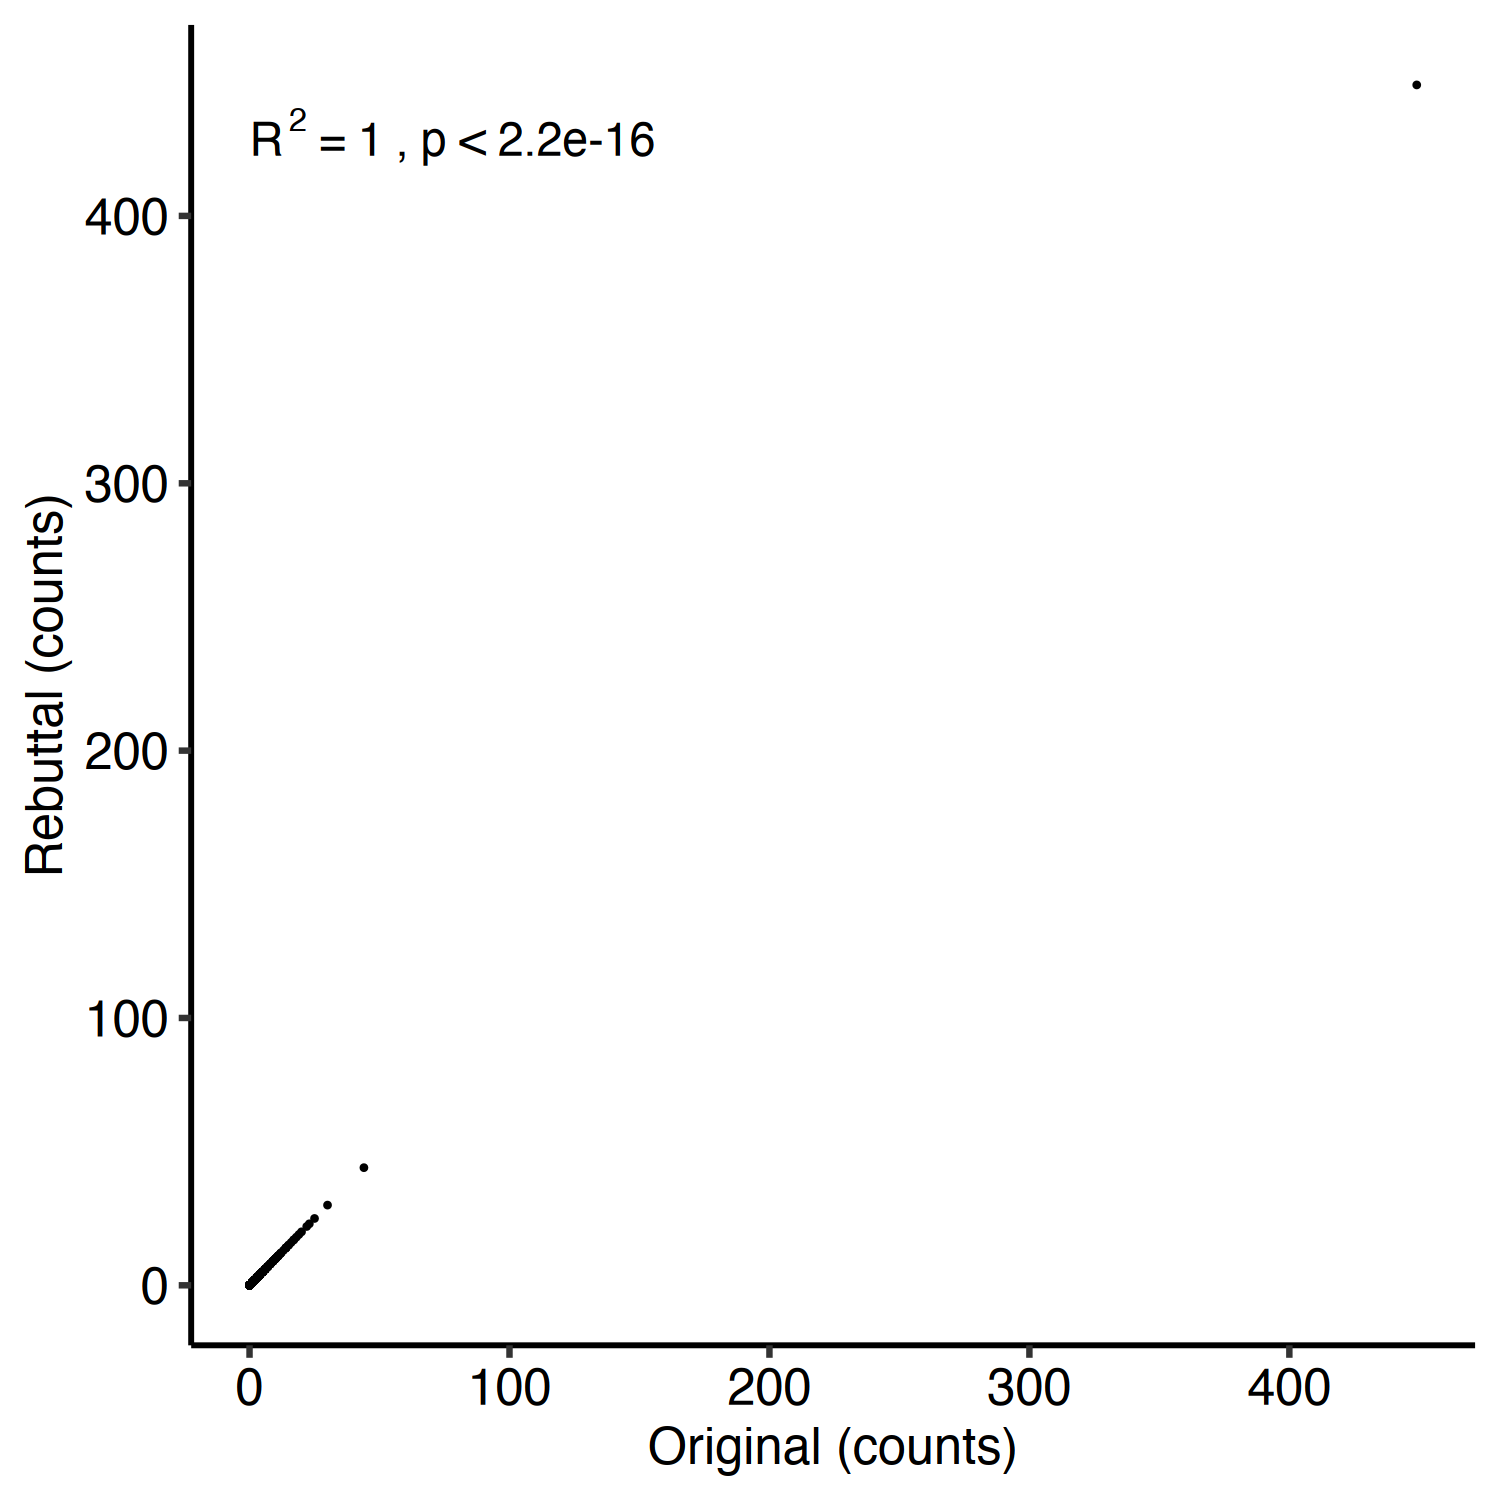

In [43]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 300, warn = -1)

ggplot(exp_df, aes(x = original, y = rebuttal)) +
        geom_point(size = 0.1) + 
        stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 0) + 
        labs(x = "Original (counts)", y = 'Rebuttal (counts)') + theme_pubr()

The Absinta dataset portion (at least for the cells we've checked) in the authors' rebuttal object seem to identically match the expression data in the original Seurat object provided to us by the authors. However, the Schirmer cells do not. As counts do not only decrease (or in the inverse, only increase), ambient RNA removal or count removal alone doesn't seem to account for this. The most likely explanation seems to be that the Schirmer dataset was processed different between the original object and the object used by the authors' in their rebuttal. Since we haven't received any explanation for this or description of the methods used to align/quantify/preprocess the Schirmer dataset, we will stick with the original data provided to us, which seems to be what was used in the original Lee et al paper.

Let's see if we can identify a single barcode match for each unmatched barcode using only the prefix of each remaining barcode:

In [44]:
barcode_key <- data.frame('rebuttal_barcode' = c(), 'original_barcode' = c())

for(i in colnames(rebuttal_data)){
    barcode_prefix <- gsub('-1_.*$', '', i)
    original_barcode <- colnames(original_data)[grep(barcode_prefix, colnames(original_data))]
    if(length(original_barcode) == 1){
        tmp_df <- data.frame('rebuttal_barcode' = c(i), 'original_barcode' = c(original_barcode))
    } else if(length(original_barcode) > 1){
        tmp_df <- data.frame('rebuttal_barcode' = c(i), 'original_barcode' = c('Multiple'))
    } else {
        tmp_df <- data.frame('rebuttal_barcode' = c(i), 'original_barcode' = c('None'))
    }
    barcode_key <- rbind(barcode_key, tmp_df)
}

head(barcode_key)       

,rebuttal_barcode,original_barcode
,<chr>,<chr>
1,AAACCTGCACCAGATT-1_1_A4,AAACCTGCACCAGATT-1_SRR9123033
2,AAAGCAATCGTCCAGG-1_1_A4,Multiple
3,AAAGTAGCAGCTGGCT-1_1_A4,None
4,AACCATGGTCCAGTAT-1_1_A4,AACCATGGTCCAGTAT-1_SRR9123033
5,AACGTTGAGATACACA-1_1_A4,AACGTTGAGATACACA-1_SRR9123033
6,AACTCAGCACAGCGTC-1_1_A4,AACTCAGCACAGCGTC-1_SRR9123033


In [45]:
barcode_key = barcode_key %>% mutate('rebuttal_suffix' = gsub('^.*-1_', '', rebuttal_barcode)) %>% 
    mutate('original_suffix' = gsub('^.*-1_', '', original_barcode))

Here we show the results in a key, where the barcode suffixes from the rebuttal object are shown as rows, and the barcode suffixes from the original object are shown as columns. The values in each cell in the table are the number of matching barcode prefixes for the indicated row-column pair. A small number of rebuttal object barcodes had multiple matches in the original object (shown in the 'Multiple' column), and a small number of rebuttal barcodes had no identical match in the original object (shown in the 'None' column).

In [46]:
prefix_keys = as.data.frame.matrix(table(barcode_key$rebuttal_suffix, barcode_key$original_suffix))
prefix_keys

,Multiple,None,SRR9123033,SRR9123034,SRR9123035,SRR9123038,SRR9123039,SRR9123041,SRR9123042,SRR9123043,SRR9123044,SRR9123045,SRR9123046,SRR9123047,SRR9123048,SRR9123049,SRR9123050,SRR9123051,SRR9123052
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1_A4,2,17,336,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1_A9,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,457
2_B4,10,8,0,0,0,226,0,0,0,0,1,0,0,0,0,0,0,0,0
2_B9,1,1,0,0,0,0,0,0,215,0,0,0,0,0,0,0,0,0,0
25G_P3C1,4,2,0,269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3_C4,4,0,0,0,0,0,0,0,0,0,432,0,0,0,0,0,0,0,0
371G_A3D3,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,311,0,0,0
5_B5,35,3,0,0,0,0,0,0,0,0,0,0,119,0,0,0,0,0,0
5546_BA9,4,0,0,0,213,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From this table we can infer the new sample identifier corresponding to most of the original sample IDs for the Schirmer dataset cells. All but one original sample identifier (SRR9123043) has one rebuttal sample identifer for which a large number of matching barcode prefixes were found. For a small number of barcode prefixes (92 cells), multiple potential sample matches were found across the datasets. We will assign each barcode to the correct sample identifier by choosing the barcode suffix with the most matching barcodes for each sample in the original dataset. For an even smaller number of rebuttal dataset barcodes (69 barcodes), no matching barcode prefix was found from the original dataset. We attribute this to the authors potentially running a new version of CellRanger or other preprocessing tool which may have corrected or processed the sequenced barcodes differently than in the original dataset. Since this number of cells is small, we will assume their loss will not affect the results of our analysis. 

Let's check what clusters the authors had assigned each of these missing barcodes to in their rebuttal analysis, to make sure these missing cells are not a core component of their new epigenetic memory cluster (Cluster 8). 

In [47]:
unmatched_rebuttal_barcodes <- barcode_key %>% filter(original_barcode == 'None') %>% .$rebuttal_barcode

In [48]:
table(human_rebuttal[,unmatched_rebuttal_barcodes]$seurat_clusters)


 0  1  2  3  4  5  6  7  8  9 10 
13 20  2  8 13  0  2  0  0 11  0 

It looks like none of the missing barcodes were assigned to the authors' rebuttal memory astrocyte cluster, and the missing barcodes are fairly distributed among the other clusters. We can likely safely assume excluding these barcodes from our analysis will not meaningfully affect our results. We'll remove them from our barcode key data frame now.

In [49]:
barcode_key <- barcode_key %>% filter(original_barcode != 'None')

Lastly, we'll need to assign each multi-matched barcode the correct sample-specific suffix to complete the barcode key. 

In [50]:
id_key = data.frame('rebuttal_sample' = rownames(prefix_keys), 'original_sample'= colnames(prefix_keys)[apply(prefix_keys, 1, which.max)])
id_key

rebuttal_sample,original_sample
<chr>,<chr>
1_A4,SRR9123033
1_A9,SRR9123052
2_B4,SRR9123038
2_B9,SRR9123042
25G_P3C1,SRR9123034
3_C4,SRR9123044
371G_A3D3,SRR9123049
5_B5,SRR9123046
5546_BA9,SRR9123035


In [51]:
barcode_key = merge(barcode_key, id_key, by.x = 'rebuttal_suffix', by.y = 'rebuttal_sample', all.x = TRUE)

In [52]:
barcode_key = barcode_key %>% mutate(corrected_original_barcode = paste(gsub('-1_.*$', '', rebuttal_barcode), original_sample, sep = '-1_'))

In [53]:
head(barcode_key)

,rebuttal_suffix,rebuttal_barcode,original_barcode,original_suffix,original_sample,corrected_original_barcode
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1_A4,AAACCTGCACCAGATT-1_1_A4,AAACCTGCACCAGATT-1_SRR9123033,SRR9123033,SRR9123033,AAACCTGCACCAGATT-1_SRR9123033
2,1_A4,AAAGCAATCGTCCAGG-1_1_A4,Multiple,Multiple,SRR9123033,AAAGCAATCGTCCAGG-1_SRR9123033
3,1_A4,AACCATGGTCCAGTAT-1_1_A4,AACCATGGTCCAGTAT-1_SRR9123033,SRR9123033,SRR9123033,AACCATGGTCCAGTAT-1_SRR9123033
4,1_A4,AACGTTGAGATACACA-1_1_A4,AACGTTGAGATACACA-1_SRR9123033,SRR9123033,SRR9123033,AACGTTGAGATACACA-1_SRR9123033
5,1_A4,AACTCAGCACAGCGTC-1_1_A4,AACTCAGCACAGCGTC-1_SRR9123033,SRR9123033,SRR9123033,AACTCAGCACAGCGTC-1_SRR9123033
6,1_A4,AAGACCTCATATGAGA-1_1_A4,AAGACCTCATATGAGA-1_SRR9123033,SRR9123033,SRR9123033,AAGACCTCATATGAGA-1_SRR9123033


As the barcode key data frame only includes barcodes from the Schirmer dataset, we'll now add in our Absinta dataset barcodes as well.

In [54]:
absinta_barcodes <- WhichCells(human, expression = `source` == 'Absinta et al 2021')

In [55]:
absinta_barcode_df = data.frame('rebuttal_suffix' = gsub('^.*-', '', absinta_barcodes), 'rebuttal_barcode' = absinta_barcodes, 'original_barcode' = absinta_barcodes, 'original_suffix' = gsub('^.*-', '', absinta_barcodes), 
                                'original_sample' = gsub('^.*-', '', absinta_barcodes), 'corrected_original_barcode' = absinta_barcodes)
head(absinta_barcode_df)

,rebuttal_suffix,rebuttal_barcode,original_barcode,original_suffix,original_sample,corrected_original_barcode
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,AAACGCTCACAGTCAT-1,AAACGCTCACAGTCAT-1,1,1,AAACGCTCACAGTCAT-1
2,1,AAACGCTGTTCGGTTA-1,AAACGCTGTTCGGTTA-1,1,1,AAACGCTGTTCGGTTA-1
3,1,AAAGAACAGGTAGATT-1,AAAGAACAGGTAGATT-1,1,1,AAAGAACAGGTAGATT-1
4,1,AAAGAACTCGTCACCT-1,AAAGAACTCGTCACCT-1,1,1,AAAGAACTCGTCACCT-1
5,1,AAAGTGAGTGCATCTA-1,AAAGTGAGTGCATCTA-1,1,1,AAAGTGAGTGCATCTA-1
6,1,AACCACAAGTCATGAA-1,AACCACAAGTCATGAA-1,1,1,AACCACAAGTCATGAA-1


In [56]:
final_barcode_key = rbind(absinta_barcode_df, barcode_key)

Now we'll merge this final barcode key with the metadata in the original Seurat object.

In [57]:
metadata_df = human@meta.data
metadata_df$original_barcode <- rownames(metadata_df)
metadata_df = merge(metadata_df, final_barcode_key, by.x = 'original_barcode', by.y = 'corrected_original_barcode', all.x = TRUE)
rownames(metadata_df) <- metadata_df$original_barcode
human@meta.data <- metadata_df[colnames(human),]

Now we'll add the original cluster IDs from the Lee et al paper to the rebuttal object, and extract the new cluster information from the rebuttal object for our data frame:

In [58]:
original_cluster_df = data.frame('rebuttal_barcode' = human$rebuttal_barcode, 'original_cluster' = human$seurat_clusters, human$original_barcode)
original_cluster_key = original_cluster_df[rowSums(is.na(original_cluster_df)) == 0,]
rownames(original_cluster_key) <- original_cluster_key$rebuttal_barcode
human_rebuttal$original_cluster <- original_cluster_key[colnames(human_rebuttal),'original_cluster']

We'll now extract the rebuttal and original clusters identities from the metadata of the rebuttal Seurat object and make a data frame.

In [59]:
tmp_df = human_rebuttal@meta.data 
original_cluster_df = merge(original_cluster_df, tmp_df[c('seurat_clusters', 'original_cluster')], by.x = 'rebuttal_barcode', by.y = 'row.names', all.x = TRUE)
cluster_ids = original_cluster_df[,c('original_cluster.x', 'seurat_clusters')]
colnames(cluster_ids) <- c('original_cluster', 'rebuttal_cluster')
cluster_ids$rebuttal_cluster <- factor(cluster_ids$rebuttal_cluster, levels = c('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Removed'))
cluster_ids[is.na(cluster_ids$rebuttal_cluster),'rebuttal_cluster'] <- 'Removed'
cluster_ids$original_cluster <- factor(cluster_ids$original_cluster, levels = c('0', '1', '2', '3', '4', '5'))

To visualize the overlap between the clusters originally shown by Lee et al in their paper and the new clusters they've created in their rebuttal, we'll create a sankey diagram. We're going to create this graph using a website, so we'll first save a text file containing all the information the webtool will need.

In [60]:
sankey_df = as.data.frame(table(cluster_ids$original_cluster, cluster_ids$rebuttal_cluster)) %>% filter(Freq > 0)
colnames(sankey_df) <- c('Original cluster', 'Rebuttal cluster', 'count')
sankey_df = sankey_df[,c('Original cluster', 'count', 'Rebuttal cluster')]
sankey_df$`Original cluster` <- paste0('O_', sankey_df$`Original cluster`)
sankey_df$`count` <- paste0('[', sankey_df$`count`, ']')
sankey_df$`Rebuttal cluster` <- paste0('R_', sankey_df$`Rebuttal cluster`)
write.table(sankey_df, 'outputs/human_rebuttal_sankey_source.txt', col.names = FALSE, row.names = FALSE, quote = FALSE)

We'll append the following text to the file to adjust the colors and formatting of our sankey diagram:

In [61]:
line = "
:O_0 #e2b63f >> 
:O_1 #d07c31 >> 
:O_2 #d95954 >>
:O_3 #84d2b0 >> 
:O_4 #3b86bd >>
:O_5 #a68afe >>

:R_0 #F8766D
:R_1 #DB8E00
:R_2 #AEA200
:R_3 #64B200
:R_4 #00BD5C
:R_5 #00C1A7
:R_6 #00BADE
:R_7 #00A6FF
:R_8 #B385FF
:R_9 #EF67EB
:R_10 #FF63B6

// === Settings ===

size w 750
  h 900
margin l 12
  r 12
  t 18
  b 20
bg color #ffffff
  transparent Y
node w 12
  h 75
  spacing 75
  border 0
  theme a
  color #888888
  opacity 1
flow curvature 0.5
  inheritfrom outside-in
  color #999999
  opacity 0.45
layout order exact
  justifyorigins N
  justifyends N
  reversegraph N
  attachincompletesto nearest
labels color #000000
  hide N
  highlight 0
  fontface sans-serif
  linespacing 0.2
  relativesize 100
  magnify 100
labelname appears Y
  size 16
  weight 400
labelvalue appears Y
  fullprecision Y
  position after
  weight 400
labelposition autoalign 0
  scheme auto
  first before
  breakpoint 3
value format ',.'
  prefix ''
  suffix ''
themeoffset a 6
  b 0
  c 0
  d 0
meta mentionsankeymatic Y
  listimbalances Y

"

write(line,file="outputs/human_rebuttal_sankey_source.txt",append=TRUE) 

The file `outputs/human_rebuttal_sankey_source.txt` can now be loaded on the SANKEYMATIC website to create a Sankey plot at [https://sankeymatic.com/build/](https://sankeymatic.com/build/)

The resulting graph should look like the one below, with original clusters shown on left, rebuttal clusters shown on right (prefixed 'O_' and 'R_' for 'original' and 'rebuttal', respectively), and cells removed by the authors in their rebuttal filtering labeled with 'R_Removed'. The number of cells is shown next to each node (cluster) on the sankey diagram.

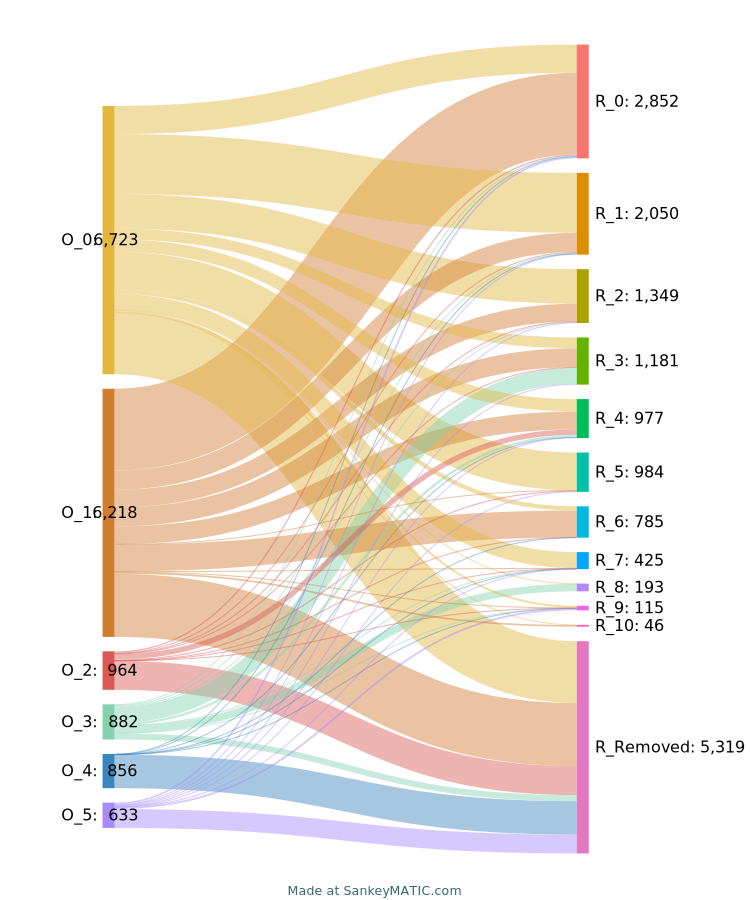

In [62]:
display_svg(file="inputs/zenodo/rebuttal/human_rebuttal_sankey.svg") 

We can see out of the 964 cells in the original Cluster 2 ("O_2"), labeled as epigenetic memory astrocytes, the vast majority were removed by the authors' filtering in their rebuttal. The new cluster labeled epigenetic memory astrocyte (Cluster 8, "R_8") is very small, containing only 193 cells. 

Let's check exactly how many cells from original Cluster 2 remain in the dataset: 

In [63]:
table(human_rebuttal$original_cluster)


   0    1    2    3    4    5 
5172 4639  237  730   18  161 

Only 237 of the cells originally labeled as epigenetic memory astrocytes remain in this dataset following the new filtering approach, meaning 75% of the original epigenetic memory astrocyte cluster cells were eliminated with the authors' removal of non-astrocyte cell types and quality control filtering. 

The authors claimed in their rebuttal that their finding of a population with an elevated epigenetic memory astrocyte signature enrichment score following this more stringent filtering demonstrates the memory phenotype is not related to cell type contamination or low quality nuclei. However, the fact that such a large fraction of the originally labeled epigenetic memory astrocyte cells were removed seems to directly contradict that claim.

Let's evaluate how many of the remaining 237 cells from original Cluster 2 are now members of the new epigenetic memory astrocyte population (Cluster 8):

In [64]:
table(human_rebuttal[,WhichCells(human_rebuttal, expression = `original_cluster` == '2')]$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10 
 31  21   7  10 135  28   2   2   0   1   0 

***Zero of the 964 cells originally labeled as epigenetic memory astrocytes by Lee et al remain labeled as such in their rebuttal reanalysis***. The new epigenetic memory astrocyte cluster (Cluster 8) in the authors' rebuttal analysis is almost completely derived from original Cluster 3, which we labeled as ependymal cells in our earlier analysis. These issues directly contradict the claim that the epigenetic memory astrocyte phenotype is unrelated to low quality nuclei and non-astrocyte cell type contamination. 

We'll next calculate enrichment scores for the corrected up-signature and FIND-seq derived signature gene sets using the expression data in the original Seurat object. First, add the rebuttal cluster identities for each cell back into the original Seurat object.

In [65]:
rownames(original_cluster_df) <- original_cluster_df$human.original_barcode
human$rebuttal_cluster <- original_cluster_df[colnames(human),'seurat_clusters']

Next, we'll remove the barcodes which the authors removed in their rebuttal anaysis.

In [66]:
human_subset <- human[,WhichCells(human, expression = `rebuttal_cluster` != 'Removed')]
human_subset

An object of class Seurat 
91241 features across 10957 samples within 2 assays 
Active assay: RNA (61992 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: SCT
 3 dimensional reductions calculated: pca, harmony, umap

Lastly, calculate the gene set enrichment scores:

In [67]:
human_subset <- AddModuleScore(human_subset, features = list(up_signature, findseq), name = 'SIGNATURE')

In [68]:
score_df = data.frame('corrected_upsig' = human_subset$SIGNATURE1,
                      'findseq' = human_subset$SIGNATURE2, 'cluster' = human_subset$rebuttal_cluster)

Let's take a look at the FIND-seq enrichment score across the new clusters: 

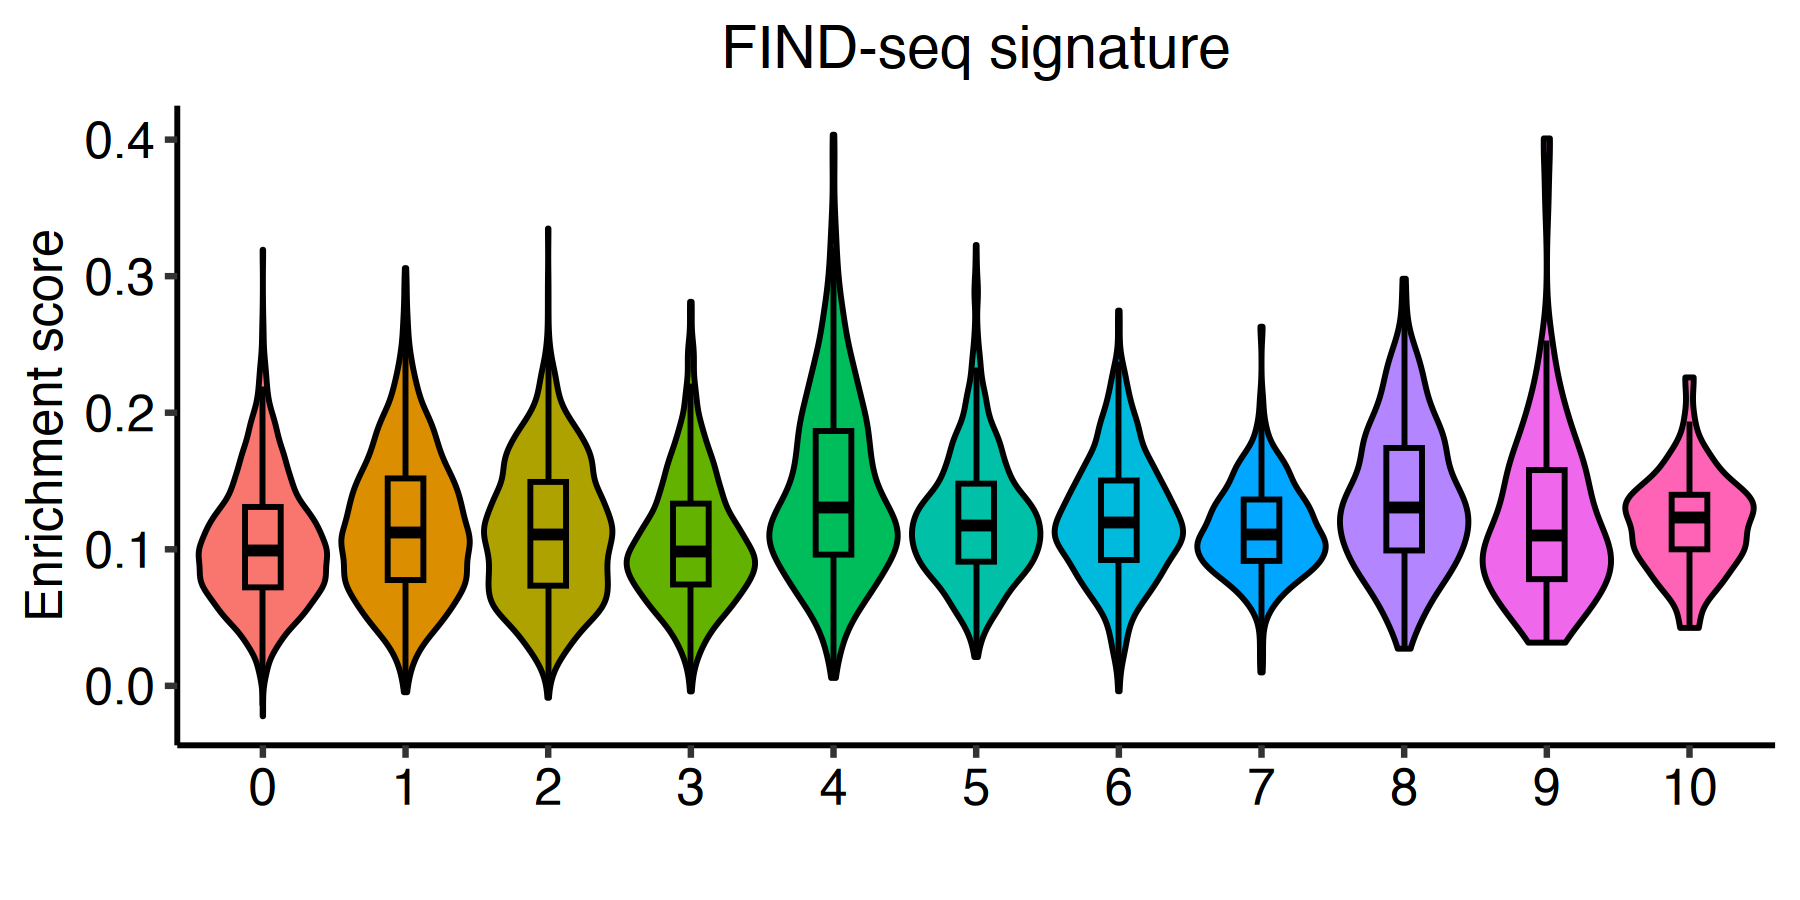

In [69]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res = 300)
image = ggplot(score_df, aes(x = cluster, y = findseq)) + 
    geom_violin(aes(fill = cluster), color = 'black', 
                scale = 'width', adjust = 1) + 
    geom_boxplot(aes(fill = cluster), color = 'black', outlier.shape = NA, width = 0.25) + 
    labs(x = '', y = 'Enrichment score', title = 'FIND-seq signature') + theme_pubr() + NoLegend() + 
    theme(plot.title = element_text(face = 'bold', size = 14, hjust=0.5))

ggsave(file="outputs/figures/human_rebuttal_findseq_scores.svg", plot=image, width=6, height=3, dpi = 600)

image

FIND-seq signature enrichment scores look rather consistent across clusters. It appears slightly higher in Cluster 8 (the new epigenetic memory astrocyte cluster) than some clusters, but this enrichment is certainly not specific to Cluster 8. Let's evalute this with a Wilcoxon Rank-Sum test:

In [70]:
Idents(human_subset) <- human_subset$rebuttal_cluster
Idents(human_subset) <- factor(Idents(human_subset), levels = c('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

In [71]:
signature2_results <- data.frame('comparison' = c(), 'stat' = c(), 'estimate' = c(), 'conf_lower' = c(), 'conf_upper' = c(), 'pval' = c())

for(i in c('0', '1', '2', '3', '4', '5', '6', '7', '9', '10')){
    wilx_res =  wilcox.test(human_subset[,WhichCells(human_subset, idents = '8')]$SIGNATURE2, 
            human_subset[,WhichCells(human_subset, idents = i)]$SIGNATURE2, 
            conf.int = TRUE, 
            exact = FALSE)  

    tmp = data.frame('comparison' = paste0('Cluster 8 vs ', i), 'stat' = wilx_res$statistic, 
                     'estimate' = wilx_res$estimate, 'conf_lower' = wilx_res$conf.int[1], 'conf_upper' = wilx_res$conf.int[2], 
                     'pval' = wilx_res$p.value)

    signature2_results <- rbind(signature2_results, tmp)
}

signature2_results$pval_adj <- p.adjust(signature2_results$pval, method = 'bonferroni')

write.table(signature2_results, 
            'outputs/human_rebuttal_FINDseq_gene_signature_enrichment_wilcoxon_test.csv', sep = ',', 
            quote = FALSE, row.names = FALSE, col.names = TRUE)

signature2_results

,comparison,stat,estimate,conf_lower,conf_upper,pval,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,Cluster 8 vs 0,374678,0.03178612,0.024595963,0.03907604,3.952129e-17,3.952129e-16
W1,Cluster 8 vs 1,239761,0.01997152,0.012039313,0.02805429,1.086179e-06,1.086179e-05
W2,Cluster 8 vs 2,162644,0.02336656,0.015401270,0.03151052,2.011883e-08,2.011883e-07
W3,Cluster 8 vs 3,153689,0.03059696,0.023051523,0.03814116,7.688627e-15,7.688627e-14
W4,Cluster 8 vs 4,91674,-0.00280746,-0.011928941,0.00621033,5.435058e-01,1.000000e+00
W5,Cluster 8 vs 5,110276,0.01367317,0.006116095,0.02132217,3.881351e-04,3.881351e-03
W6,Cluster 8 vs 6,86865,0.01264509,0.004790876,0.02050369,1.574112e-03,1.574112e-02
W7,Cluster 8 vs 7,51365,0.01949816,0.011913179,0.02721791,4.837542e-07,4.837542e-06
W8,Cluster 8 vs 9,13117,0.01751111,0.004931871,0.02966826,7.570017e-03,7.570017e-02


We can see that Cluster 8's FIND-seq scores are not significantly different than Cluster 4, Cluster 9, or Cluster 10.

Let's examine the corrected up-signature's enrichment scores across the new clusters: 

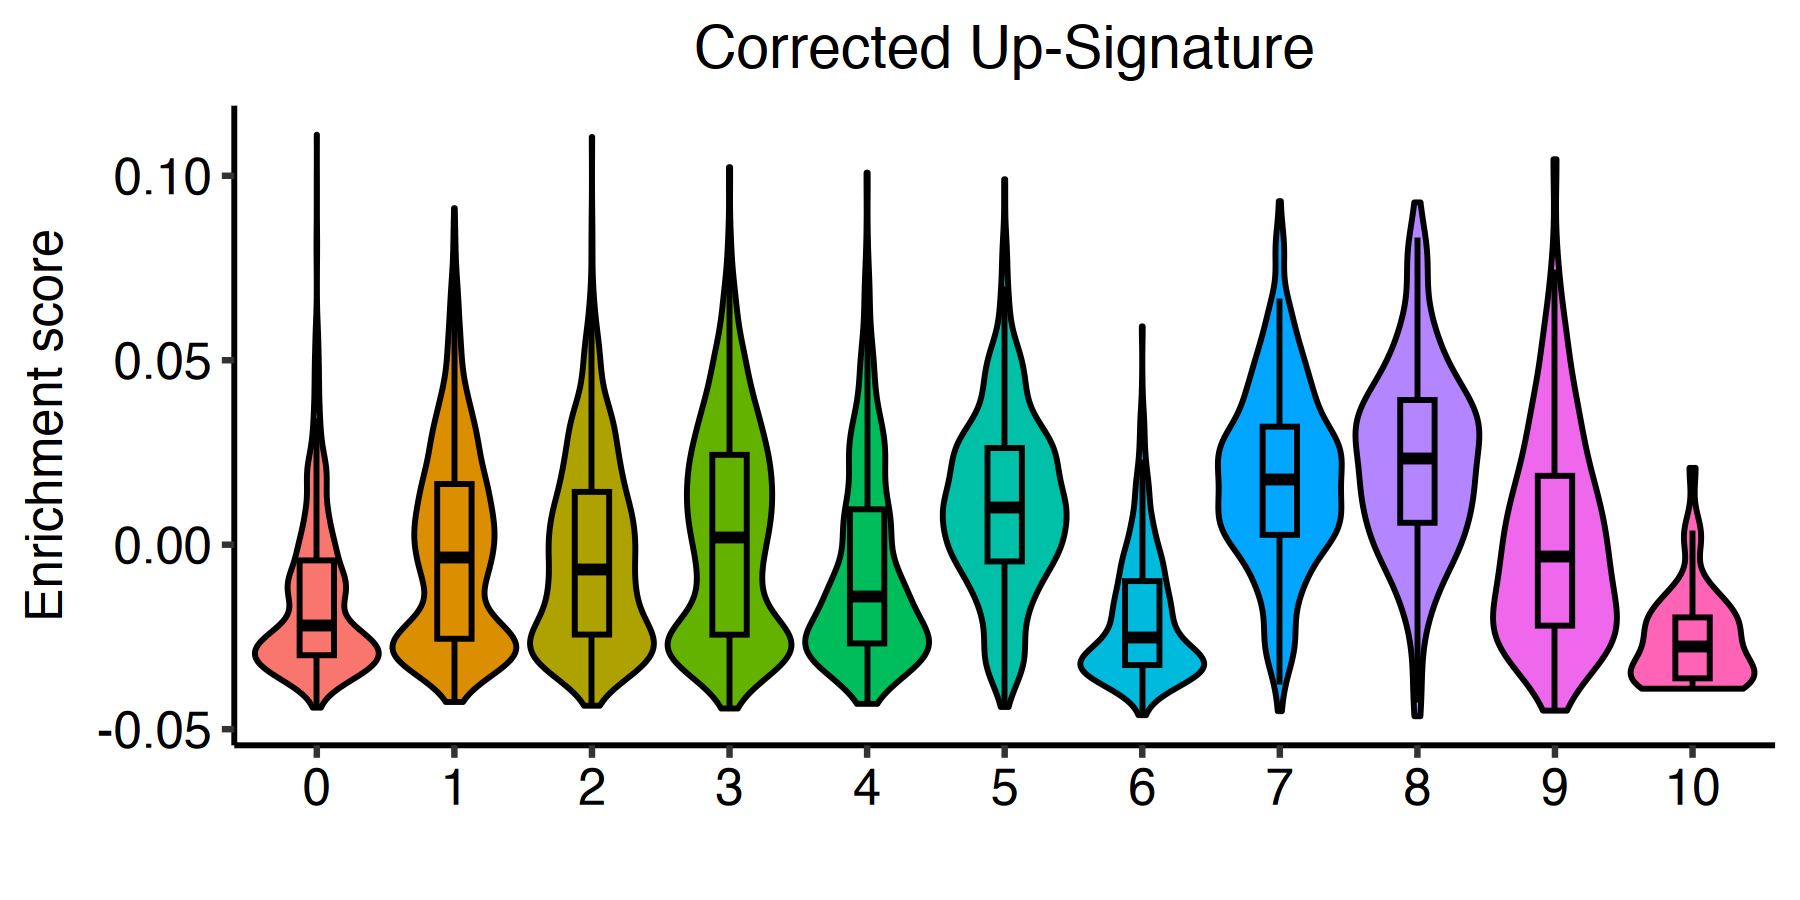

In [72]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res = 300)
image = ggplot(score_df, aes(x = cluster, y = corrected_upsig)) + 
    geom_violin(aes(fill = cluster), color = 'black', 
                scale = 'width', adjust = 1) + 
    geom_boxplot(aes(fill = cluster), color = 'black', outlier.shape = NA, width = 0.25) + 
    labs(x = '', y = 'Enrichment score', title = 'Corrected Up-Signature') + theme_pubr() + NoLegend() + 
    theme(plot.title = element_text(face = 'bold', size = 14, hjust=0.5))

ggsave(file="outputs/figures/human_rebuttal_corrected_upsignature_scores.svg", plot=image, width=6, height=3, dpi = 600)

image

Cluster 8 looks to have higher enrichment in in the corrected up-signature gene set compared to some other clusters. Let's evaluate this with a Wilcoxon Rank-Sum test: 

In [73]:
signature1_results <- data.frame('comparison' = c(), 'stat' = c(), 'estimate' = c(), 'conf_lower' = c(), 'conf_upper' = c(), 'pval' = c())

for(i in c('0', '1', '2', '3', '4', '5', '6', '7', '9', '10')){
    wilx_res =  wilcox.test(human_subset[,WhichCells(human_subset, idents = '8')]$SIGNATURE1, 
            human_subset[,WhichCells(human_subset, idents = i)]$SIGNATURE1, 
            conf.int = TRUE, 
            exact = FALSE)  

    tmp = data.frame('comparison' = paste0('Cluster 8 vs ', i), 'stat' = wilx_res$statistic, 
                     'estimate' = wilx_res$estimate, 'conf_lower' = wilx_res$conf.int[1], 'conf_upper' = wilx_res$conf.int[2], 
                     'pval' = wilx_res$p.value)

    signature1_results <- rbind(signature1_results, tmp)
}

signature1_results$pval_adj <- p.adjust(signature1_results$pval, method = 'bonferroni')

write.table(signature1_results, 
            'outputs/human_rebuttal_corrected_upsignature_enrichment_wilcoxon_test.csv', sep = ',', 
            quote = FALSE, row.names = FALSE, col.names = TRUE)

signature1_results

,comparison,stat,estimate,conf_lower,conf_upper,pval,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,Cluster 8 vs 0,482851,0.039444214,0.036174162,0.042674850,4.504110e-69,4.504110e-68
W1,Cluster 8 vs 1,297941,0.026259795,0.022411186,0.030084412,2.602997e-31,2.602997e-30
W2,Cluster 8 vs 2,200883,0.027571273,0.023752254,0.031389074,2.434376e-34,2.434376e-33
W3,Cluster 8 vs 3,159361,0.021481848,0.017040756,0.025880891,6.538738e-19,6.538738e-18
W4,Cluster 8 vs 4,150435,0.032091157,0.028271632,0.036046324,3.715620e-39,3.715620e-38
W5,Cluster 8 vs 5,122328,0.012553866,0.008768137,0.016385123,2.308318e-10,2.308318e-09
W6,Cluster 8 vs 6,138971,0.043672723,0.040224043,0.046999684,2.719048e-72,2.719048e-71
W7,Cluster 8 vs 7,46064,0.005256435,0.001093078,0.009485388,1.406675e-02,1.406675e-01
W8,Cluster 8 vs 9,16228,0.023950139,0.017740047,0.029911932,1.154435e-11,1.154435e-10


Notably, Cluster 8's scores are not statistically different compared to Cluster 7.

Let's examine expression of the up-signature genes across the clusters using a dot plot, to better visualization the percentage of cells expressing each gene within each cluster: 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


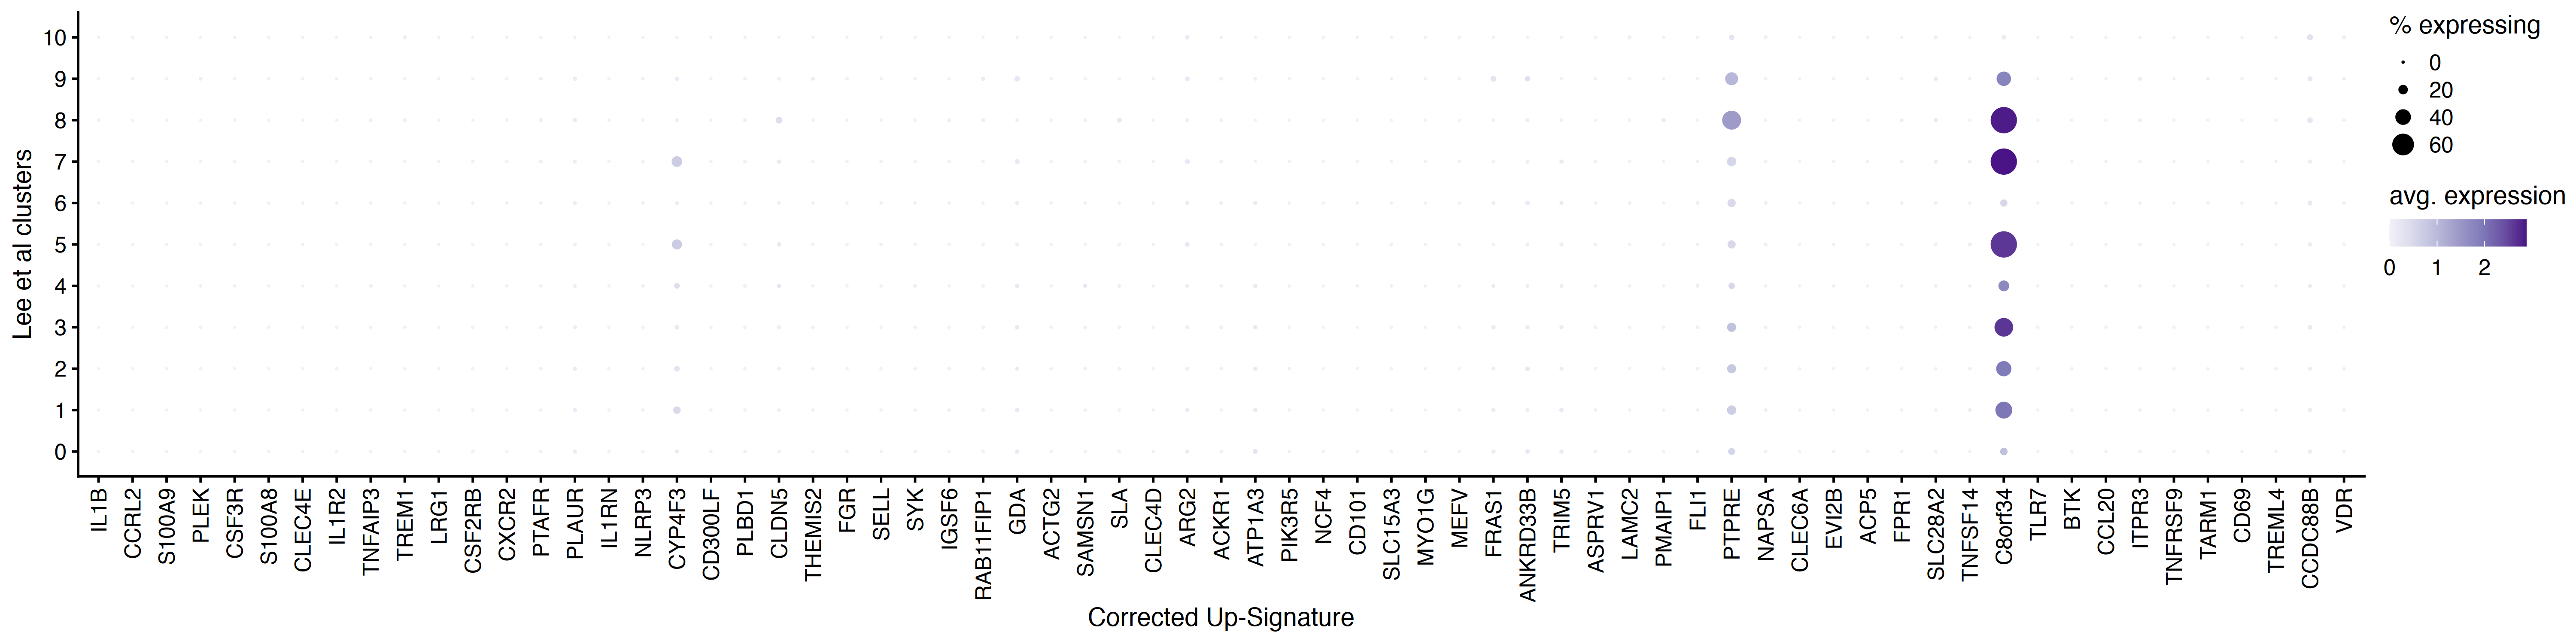

In [74]:
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 300, warn = -1)

image = DotPlot(human_rebuttal, features = up_signature, assay = 'RNA', group.by = 'seurat_clusters', scale = FALSE, scale.min = 0, scale.max = 75) + 
    scale_color_distiller(palette = 'Purples', direction = 1, breaks = scales::pretty_breaks(n = 4)) + 
    guides(color = guide_colorbar(title = 'avg. expression', direction = "horizontal", title.position = "top"),
          size = guide_legend(title = "% expressing")) + 
    labs(y = 'Lee et al clusters', x = 'Corrected Up-Signature', color = NULL, size = '% expressing') + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, face = 'italic'), legend.justification = "top")

ggsave(file="outputs/figures/human_rebuttal_corrected_upsignature_dotplot.svg", plot=image, width=20, height=5, dpi = 600)

image

options(warn = 0)

Almost all of the genes in the corrected up-signature are not expressed across any of the clusters in this dataset. It appears Cluster 8's up-signature enrichment scores are largely driven by slightly increased expression of just 2 genes within the corrected up-signature gene set: *PTPRE* and *C8orf34*. Let's verify this by recalculating enrichment scores with the corrected up-signature gene set but removing these two genes. 

In [75]:
human_subset <- AddModuleScore(human_subset, features = list(setdiff(up_signature, c('PTPRE', 'C8orf34'))), name = 'UPSIG_test')

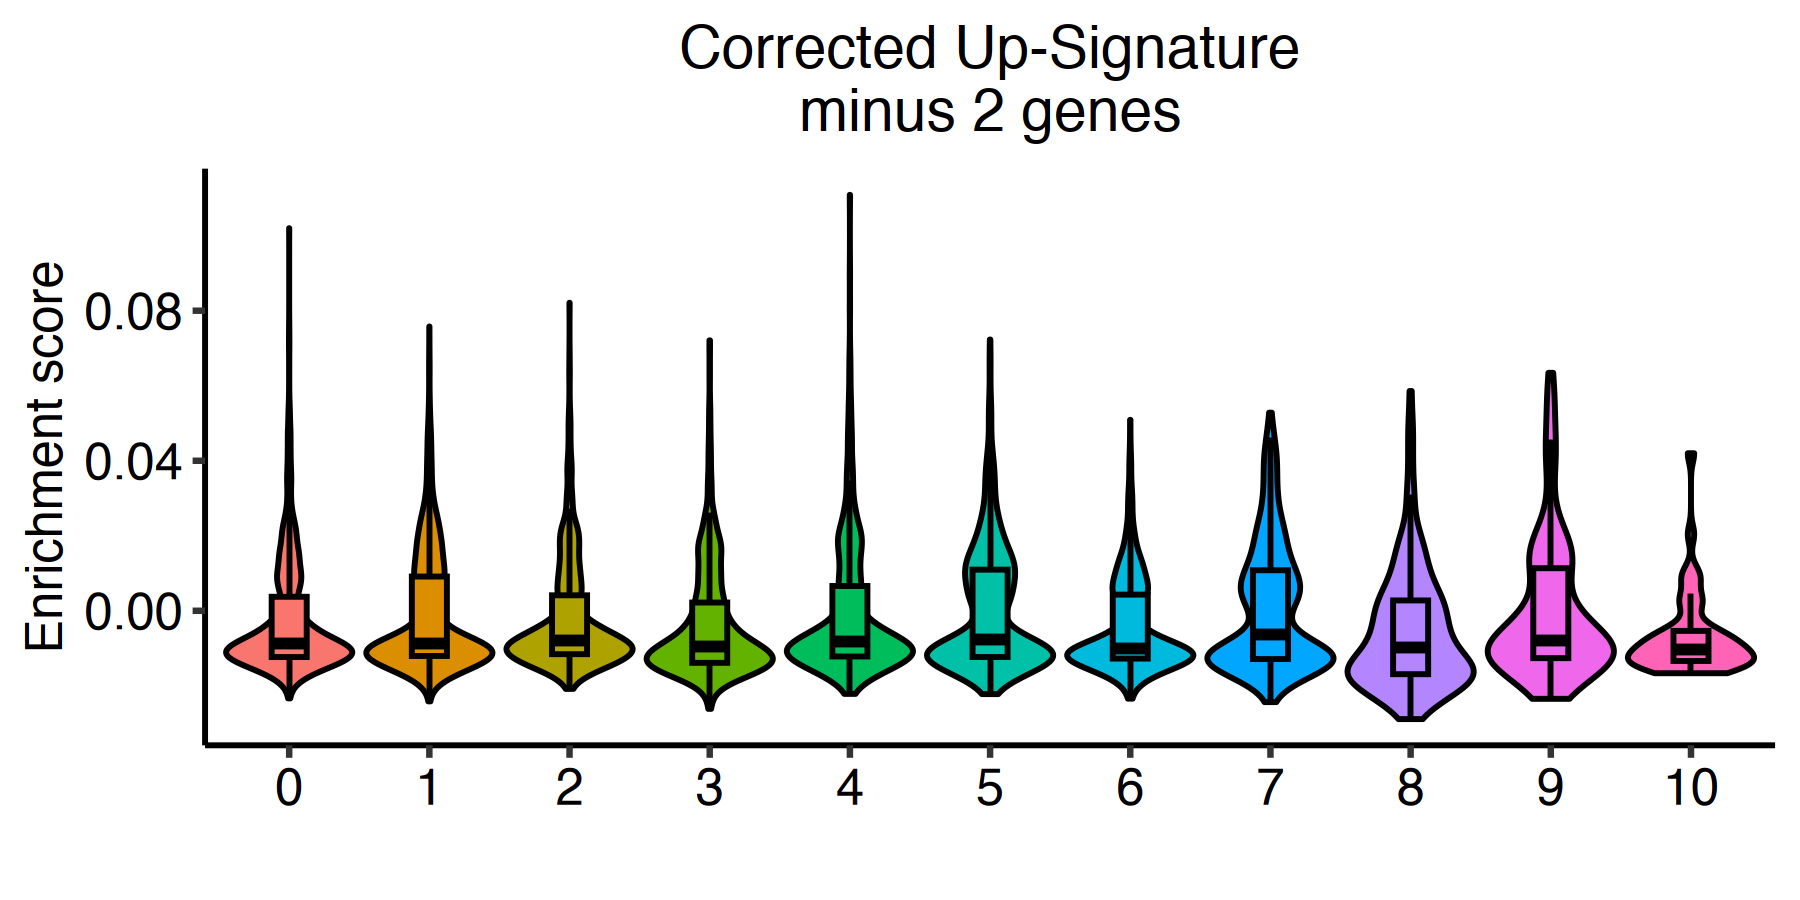

In [76]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res = 300)
image = ggplot(human_subset@meta.data, aes(x = rebuttal_cluster, y = UPSIG_test1)) + 
    geom_violin(aes(fill = rebuttal_cluster), color = 'black', 
                scale = 'width', adjust = 1) + 
    geom_boxplot(aes(fill = rebuttal_cluster), color = 'black', outlier.shape = NA, width = 0.25) + 
    labs(x = '', y = 'Enrichment score', title = 'Corrected Up-Signature\nminus 2 genes') + theme_pubr() + NoLegend() + 
    theme(plot.title = element_text(face = 'bold', size = 14, hjust=0.5))

ggsave(file="outputs/figures/human_rebuttal_corrected_upsignature_scores_minus_2_genes.svg", plot=image, width=6, height=3, dpi = 600)

image

In [77]:
ablation_results <- data.frame('comparison' = c(), 'stat' = c(), 'estimate' = c(), 'conf_lower' = c(), 'conf_upper' = c(), 'pval' = c())

for(i in c('0', '1', '2', '3', '4', '5', '6', '7', '9', '10')){
    wilx_res =  wilcox.test(human_subset[,WhichCells(human_subset, idents = '8')]$UPSIG_test1, 
            human_subset[,WhichCells(human_subset, idents = i)]$UPSIG_test1, 
            conf.int = TRUE, 
            exact = FALSE)  

    tmp = data.frame('comparison' = paste0('Cluster 8 vs ', i), 'stat' = wilx_res$statistic, 
                     'estimate' = wilx_res$estimate, 'conf_lower' = wilx_res$conf.int[1], 'conf_upper' = wilx_res$conf.int[2], 
                     'pval' = wilx_res$p.value)

    ablation_results <- rbind(ablation_results, tmp)
}

ablation_results$pval_adj <- p.adjust(ablation_results$pval, method = 'bonferroni')

write.table(ablation_results, 
            'outputs/human_rebuttal_corrected_upsignature_minus_2_genes_enrichment_wilcoxon_test.csv', sep = ',', 
            quote = FALSE, row.names = FALSE, col.names = TRUE)

ablation_results

,comparison,stat,estimate,conf_lower,conf_upper,pval,pval_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,Cluster 8 vs 0,229540,-0.003419444,-0.004909095,-0.0017876862,1.113930e-04,1.113930e-03
W1,Cluster 8 vs 1,154866,-0.004503379,-0.006015059,-0.0028768560,5.905625e-07,5.905625e-06
W2,Cluster 8 vs 2,104754,-0.004050108,-0.005655612,-0.0023729739,1.112483e-05,1.112483e-04
W3,Cluster 8 vs 3,101227,-0.002209286,-0.003839946,-0.0005215396,1.267739e-02,1.267739e-01
W4,Cluster 8 vs 4,76157,-0.004042591,-0.005715030,-0.0023160564,2.390480e-05,2.390480e-04
W5,Cluster 8 vs 5,71193,-0.005250610,-0.006988274,-0.0035360008,3.724602e-08,3.724602e-07
W6,Cluster 8 vs 6,65775,-0.002611260,-0.004148481,-0.0008673373,4.542193e-03,4.542193e-02
W7,Cluster 8 vs 7,30129,-0.005391742,-0.007406197,-0.0034993565,1.217868e-07,1.217868e-06
W8,Cluster 8 vs 9,8913,-0.004284239,-0.006930775,-0.0015275208,3.865598e-03,3.865598e-02


We can see that removal of just two genes from the up-signature gene set complete abolishes any elevation of the signature enrichment scores in Cluster 8, the purported memory astrocyte cluster in the authors' rebuttal analysis. These two genes are not specific to astrocytes and are expressed across other cell types in the brain. This is poor evidence for an epigenetic memory astrocyte state.

Let's examine expression of the corrected up-signature gene set across all clusters at the sample level. To visualize sample heterogeneity, we'll first group cells into sample-cluster pseudobulks.

In [78]:
ag_rebuttal = AggregateExpression(human_subset, assays = 'RNA', group.by = c('rebuttal_cluster', 'sample_number'), return.seurat = TRUE)
pseudobulk_mat <- LayerData(ag_rebuttal, assay = 'RNA', layer = 'data', features = up_signature)

Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.
First group.by variable `rebuttal_cluster` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.
Centering and scaling data matrix



pdf 
  2

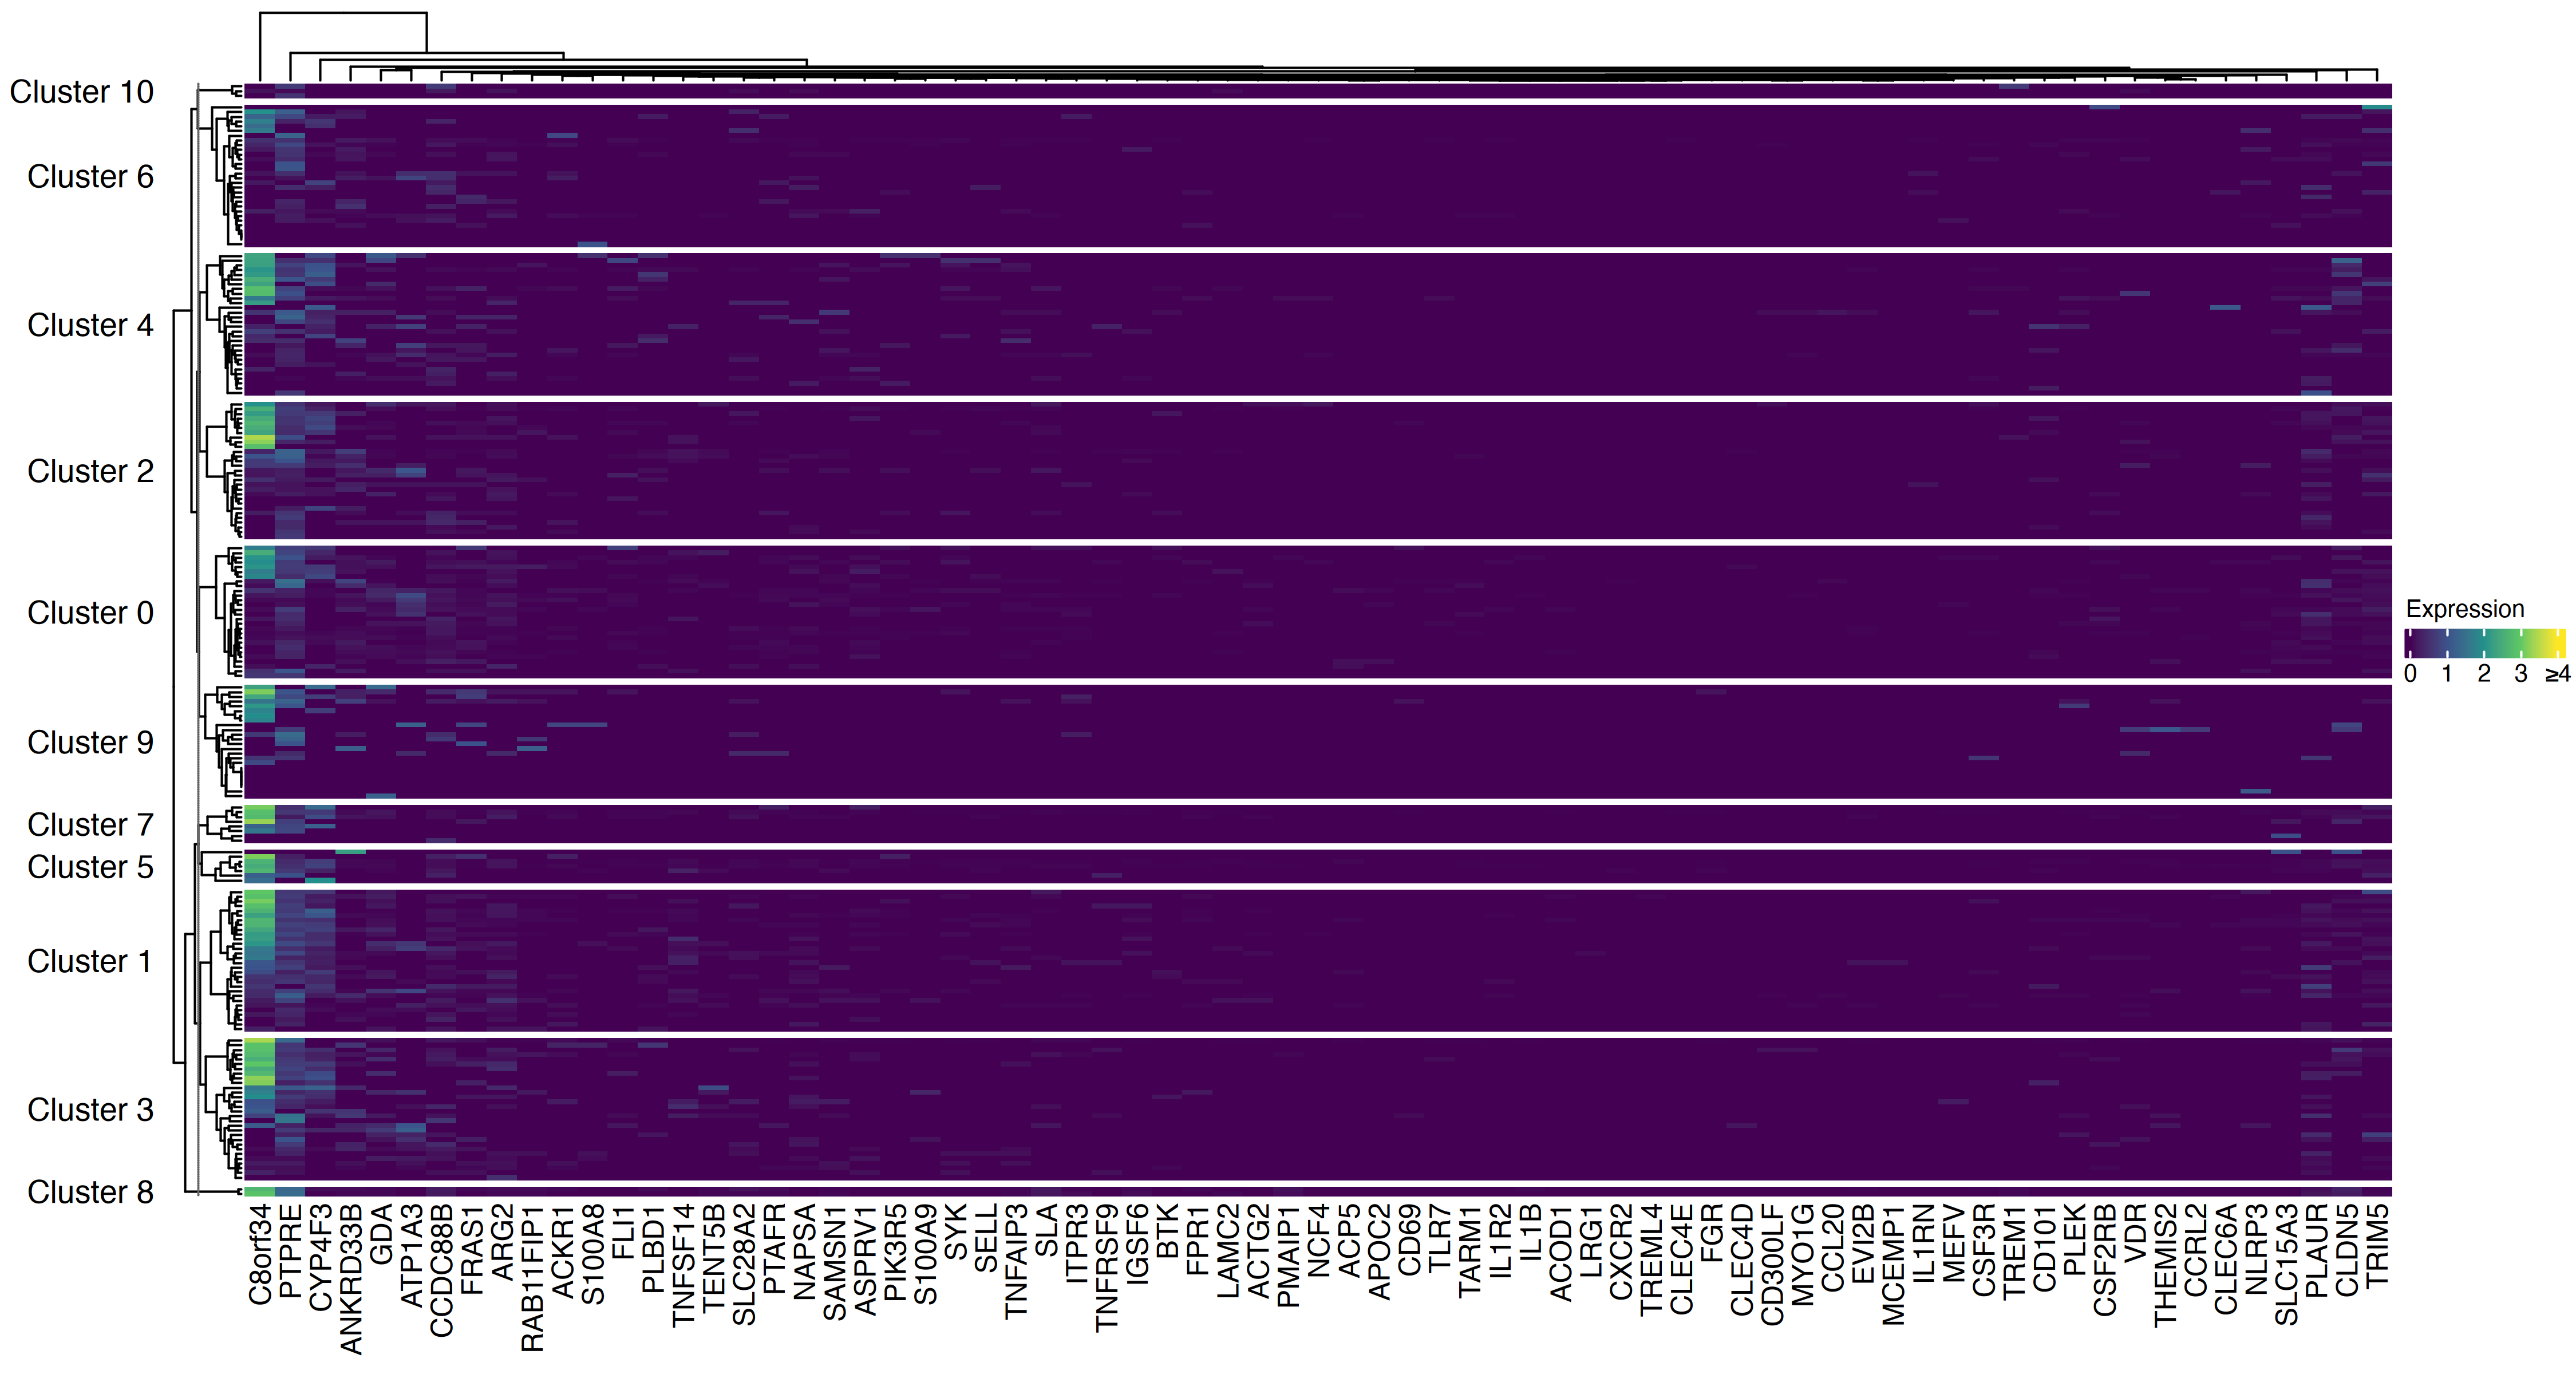

In [79]:
options(repr.plot.width=15, repr.plot.height=8, repr.plot.res = 300, warn = -1)

png("outputs/figures/human_rebuttal_corrected_upsignature_pseudobulkheatmap.png",width=15,height=8,units="in",res=1200)

ht <- Heatmap(name = 'Expression', t(pseudobulk_mat), col = circlize::colorRamp2(breaks = c(0, 1, 2, 3, 4), colors = viridis(option = 'viridis', n = 5)),
       row_split = gsub("g", "Cluster ", ag_rebuttal$rebuttal_cluster), 
              row_title_rot = 0, 
              show_row_names = FALSE,
              show_column_names = TRUE,
              column_names_gp = gpar(fontface = "italic"),
              
      heatmap_legend_param = list(direction = 'horizontal', at = c(0, 1, 2, 3, 4), labels = c('0', "1", "2", "3", "≥4")))

draw(ht)

dev.off()

ht

options(warn = 0)

We can see that expression of the corrected up-signature gene set is not robustly increased across samples in any cluster, much less Cluster 8. Let's visualize expression across all single cells as well: 

In [80]:
exp_mat <- LayerData(human_subset, assay = 'RNA', layer = 'data', features = up_signature)

pdf 
  2

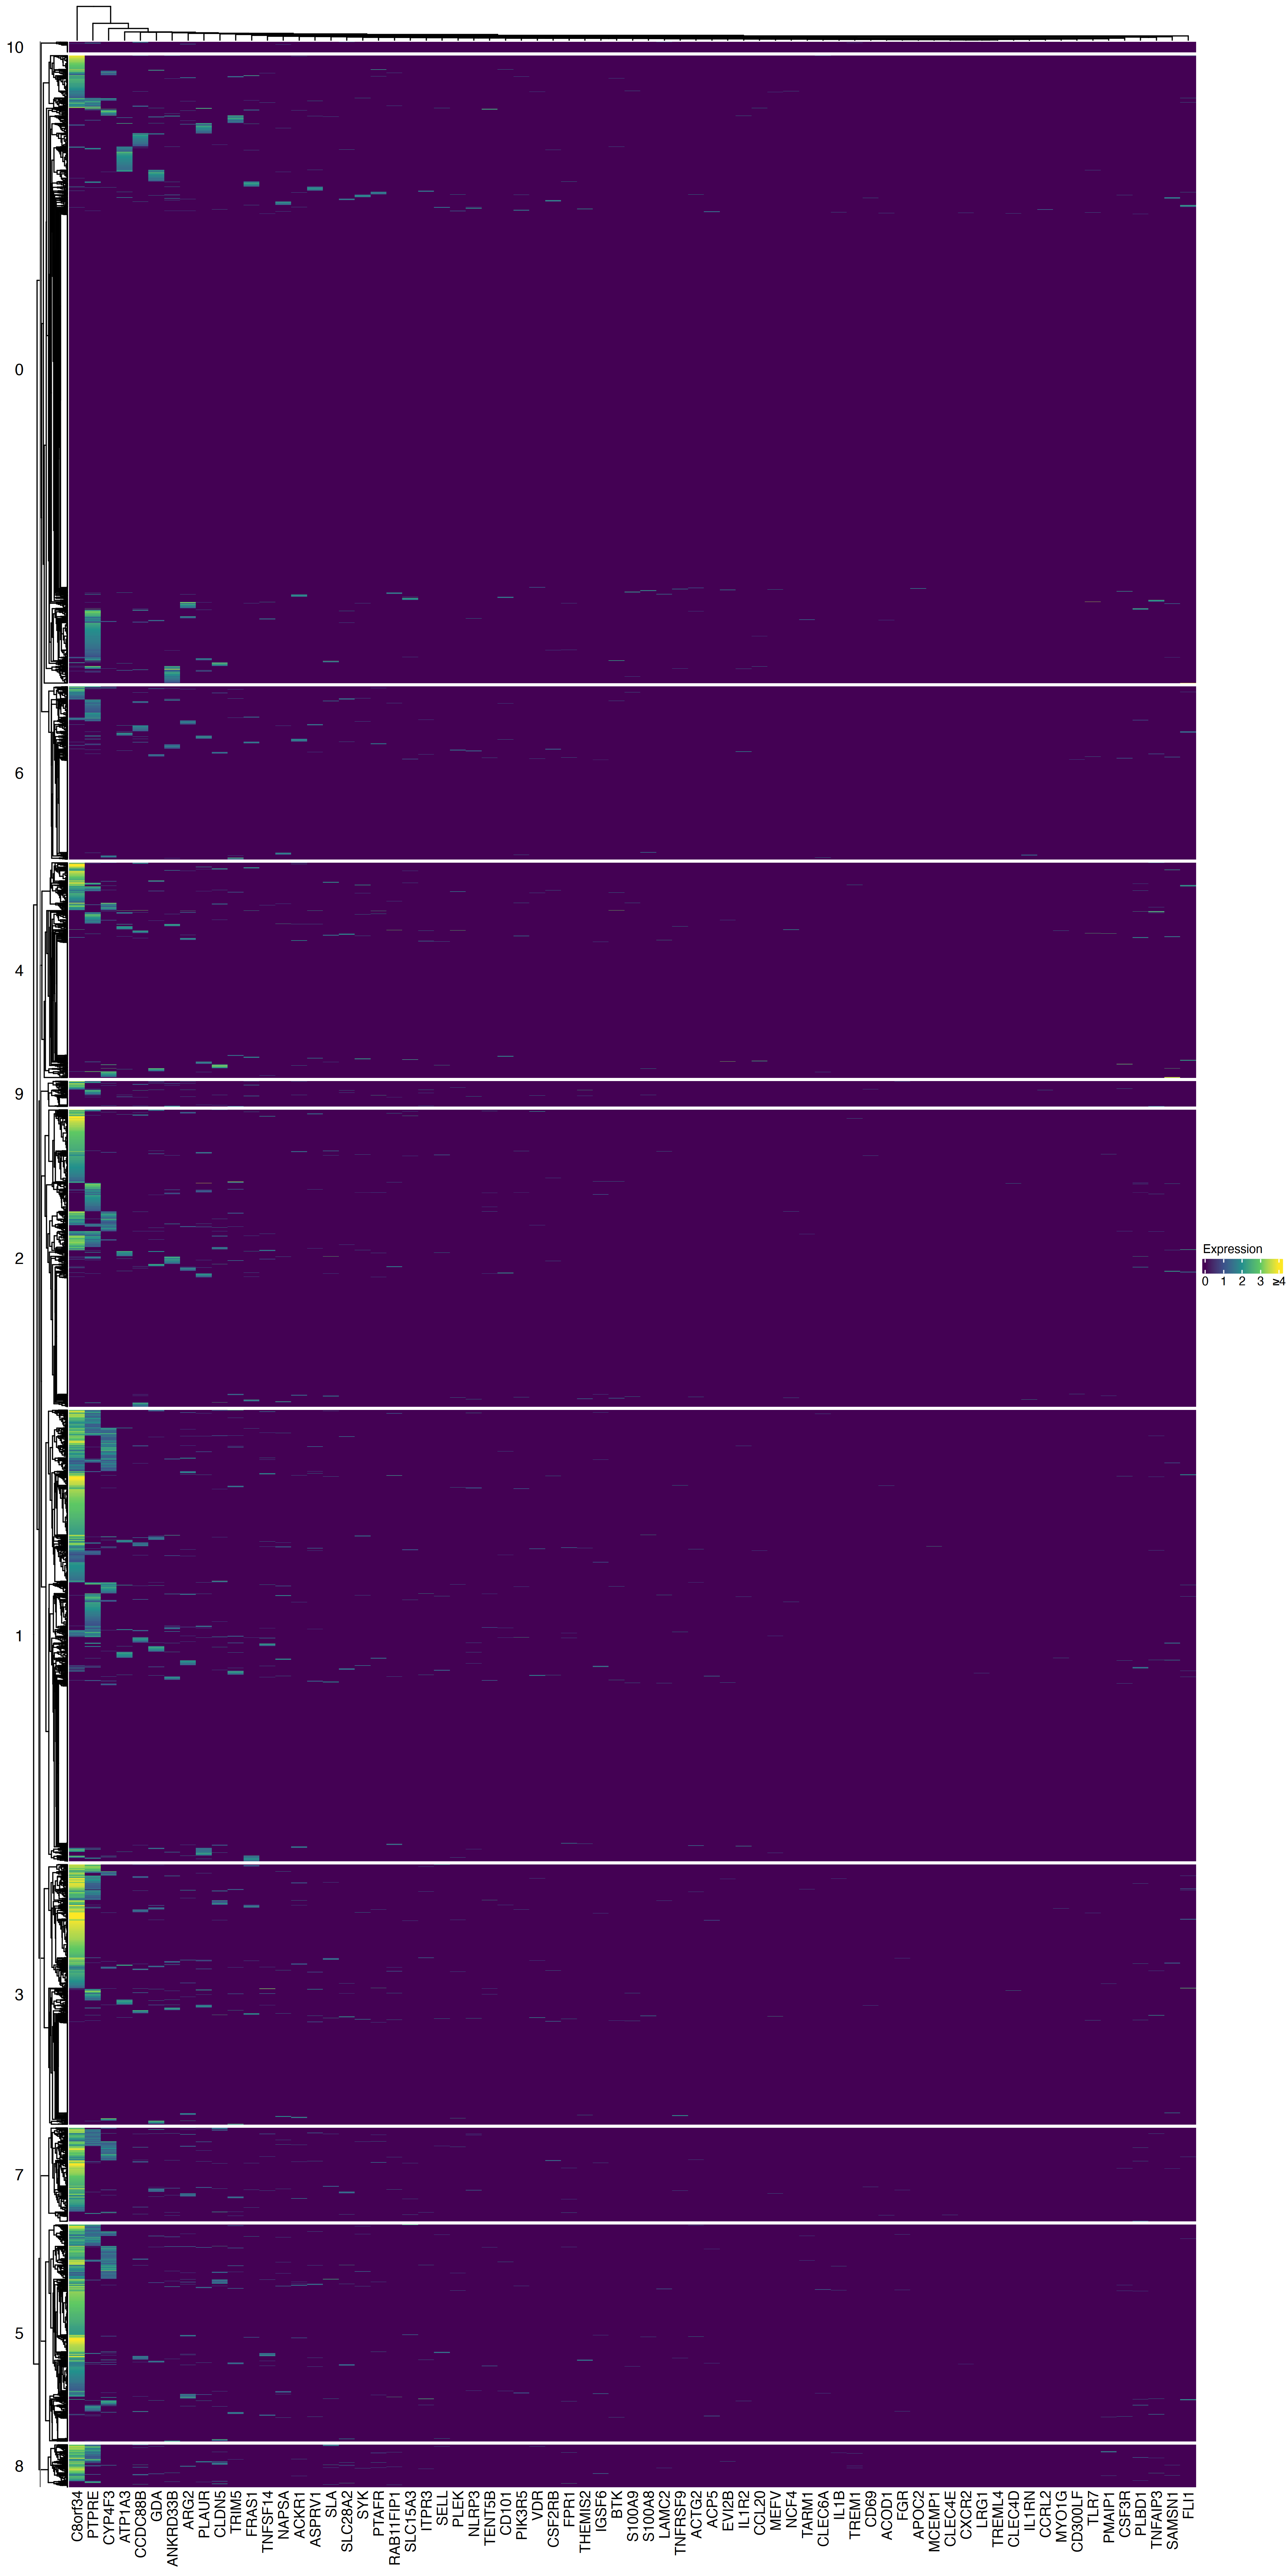

In [81]:
options(repr.plot.width=15, repr.plot.height=30, repr.plot.res = 300, warn = -1)

png("outputs/figures/human_rebuttal_corrected_upsignature_singlecells_heatmap.png",width=15,height=30,units="in",res=1200)

ht <- Heatmap(name = 'Expression', t(as.matrix(exp_mat)), col = circlize::colorRamp2(breaks = c(0, 1, 2, 3, 4), colors = viridis(option = 'viridis', n = 5)),
       row_split = gsub("g", "Cluster ", human_subset$rebuttal_cluster), 
              row_title_rot = 0, 
              show_row_names = FALSE,
              show_column_names = TRUE,
              column_names_gp = gpar(fontface = "italic"),
              use_raster = FALSE,
      heatmap_legend_param = list(direction = 'horizontal', at = c(0, 1, 2, 3, 4), labels = c('0', "1", "2", "3", "≥4")))

draw(ht)

dev.off()

ht

options(warn = 0)

Again, it is clear that there is no enrichment of the corrected up-signature genes across the presented clusters, much less in Cluster 8. The presentation of Cluster 9 as epigenetic memory astrocytes in the authors' rebuttal thus appears not supported by the data.

Let's examine marker genes across the rebuttal clusters in the original Seurat object:

In [82]:
# geometric mean with static pseudocount (Scanpy log2FC formula)
mean.fxn_geo <- function(x) {
    return(log(x = (expm1(rowMeans(x = x)) + 1e-9), base = 2))
}

# create an empty list for comparing FoldChange calculation results across all clusters
presto_results <- data.frame()

for(i in levels(Idents(human_subset))){ # loop through all clusters
    
    print(paste0("Calculating markers for cluster ", i))
    
    data <- GetAssayData(object = human_subset[['RNA']], layer = "data")
    
    # get cell names for groupings (from differential_expression.R line 1701-1749 [https://github.com/satijalab/seurat/blob/master/R/differential_expression.R#L1701])
    IdentsToCells <- function(
      object,
      ident.1,
      ident.2,
      cellnames.use
    ) {
      #
      if (is.null(x = ident.1)) {
        stop("Please provide ident.1")
      } 
      if (length(x = as.vector(x = ident.1)) > 1 &&
          any(as.character(x = ident.1) %in% cellnames.use)) {
        bad.cells <- cellnames.use[which(x = !as.character(x = ident.1) %in% cellnames.use)]
        if (length(x = bad.cells) > 0) {
          stop(paste0("The following cell names provided to ident.1 are not present in the object: ", paste(bad.cells, collapse = ", ")))
        }
      } else {
        ident.1 <- WhichCells(object = object, idents = ident.1)
      }
      # if NULL for ident.2, use all other cells
      if (length(x = as.vector(x = ident.2)) > 1 &&
          any(as.character(x = ident.2) %in% cellnames.use)) {
        bad.cells <- cellnames.use[which(!as.character(x = ident.2) %in% cellnames.use)]
        if (length(x = bad.cells) > 0) {
          stop(paste0("The following cell names provided to ident.2 are not present in the object: ", paste(bad.cells, collapse = ", ")))
        }
      } else {
        if (is.null(x = ident.2)) {
          ident.2 <- setdiff(x = cellnames.use, y = ident.1)
        } else {
          ident.2 <- WhichCells(object = object, idents = ident.2)
        }
      }
      return(list(cells.1 = ident.1, cells.2 = ident.2))
    }
    
    # extract cell lists using IdentsToCells function
    cells <- IdentsToCells(object = human_subset, ident.1 = i, ident.2 = NULL, cellnames.use = colnames(human_subset))
    cells.1 <- cells$cells.1
    cells.2 <- cells$cells.2

    # order data matrix by group
    data <- data[, c(cells.1, cells.2), drop = FALSE]

    # calculate Scanpy fold change
    data.1 <- mean.fxn_geo(data[, cells.1, drop = FALSE])
    data.2 <- mean.fxn_geo(data[, cells.2, drop = FALSE])
    fc_geo <- (data.1 - data.2)

    # get group labels
    group.info <- data.frame(row.names = c(cells.1, cells.2))
    group.info[cells.1, "group"] <- "Group1"
    group.info[cells.2, "group"] <- "Group2"
    group.info[, "group"] <- factor(x = group.info[, "group"])

    # run presto wilcoxon test
    res <- wilcoxauc(X = data, y = group.info[, "group"])
    res <- res[1:(nrow(x = res)/2),]
    res$cluster <- i
    res$log2FC = fc_geo

    res$padj <- NULL
    res$logFC <- NULL
    res$group <- NULL
    
    
    res$p_val_adj = p.adjust(
      p =res$pval,
      method = "bonferroni",
      n = nrow(data)
    )
    
    presto_results <- rbind(presto_results, res)

}
# replace zero p-values with more accurate minimum value representable
presto_results = presto_results %>% mutate(p_val_adj = ifelse(p_val_adj == 0, .Machine$double.xmin, p_val_adj))

(presto_results %>% filter(cluster == '8') %>% arrange(p_val_adj, desc(log2FC)))[1:30,]

[1] "Calculating markers for cluster 0"
[1] "Calculating markers for cluster 1"
[1] "Calculating markers for cluster 2"
[1] "Calculating markers for cluster 3"
[1] "Calculating markers for cluster 4"
[1] "Calculating markers for cluster 5"
[1] "Calculating markers for cluster 6"
[1] "Calculating markers for cluster 7"
[1] "Calculating markers for cluster 8"
[1] "Calculating markers for cluster 9"
[1] "Calculating markers for cluster 10"


,feature,avgExpr,statistic,auc,pval,pct_in,pct_out,cluster,log2FC,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,CFAP157,2.2536997,2002934,0.9641303,0.000000e+00,94.30052,4.0969900,8,6.952961,2.225074e-308
2,CFAP299,3.4284373,1969525,0.9480484,0.000000e+00,97.92746,9.9591230,8,6.468644,2.225074e-308
3,AC104078.2,0.6375117,1433094,0.6898325,0.000000e+00,38.86010,1.0126347,8,5.936858,2.225074e-308
4,ITGA11,0.5901422,1406586,0.6770727,0.000000e+00,36.26943,0.9476031,8,5.849091,2.225074e-308
5,FAM92B,0.5414364,1410978,0.6791868,0.000000e+00,36.78756,1.0033445,8,5.687933,2.225074e-308
6,PRR29,0.5703872,1426186,0.6865073,0.000000e+00,38.34197,1.1241174,8,5.620622,2.225074e-308
7,SPAG6,1.7493465,1879964,0.9049372,0.000000e+00,86.01036,5.2489781,8,5.431908,2.225074e-308
8,DNAI2,1.0931926,1662624,0.8003189,0.000000e+00,62.69430,2.9635823,8,5.342009,2.225074e-308
9,CFAP73,1.4705658,1772036,0.8529853,0.000000e+00,74.09326,5.2675585,8,5.256379,2.225074e-308


Save the differential expression test results to a CSV file:

In [83]:
write.table(presto_results %>% arrange(cluster, p_val_adj, desc(log2FC)), 
            'outputs/human_rebuttal_clusters_de_test_results.csv', sep = ',', 
            quote = FALSE, row.names = FALSE, col.names = TRUE)

cluster8_sig_results <- presto_results %>% filter(cluster == '8') %>% filter(abs(log2FC) > 1) %>% 
    filter(p_val_adj < 0.05) %>% arrange(p_val_adj, desc(log2FC))
write.table(cluster8_sig_results, 'outputs/human_rebuttal_cluster8_wilcoxon_test_results_DEGs.csv', sep = ',', 
            quote = FALSE, row.names = FALSE, col.names = TRUE)

Next, let's create a volcano plot of the differential expression data from Cluster 8, the cluster labeled as the new epigenetic memory astrocytes by Lee et al.

Warning message:
“Removed 18693 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 61981 rows containing missing values or values outside the scale range (`geom_text_repel()`).”
Warning message:
“Removed 18693 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 61981 rows containing missing values or values outside the scale range (`geom_text_repel()`).”


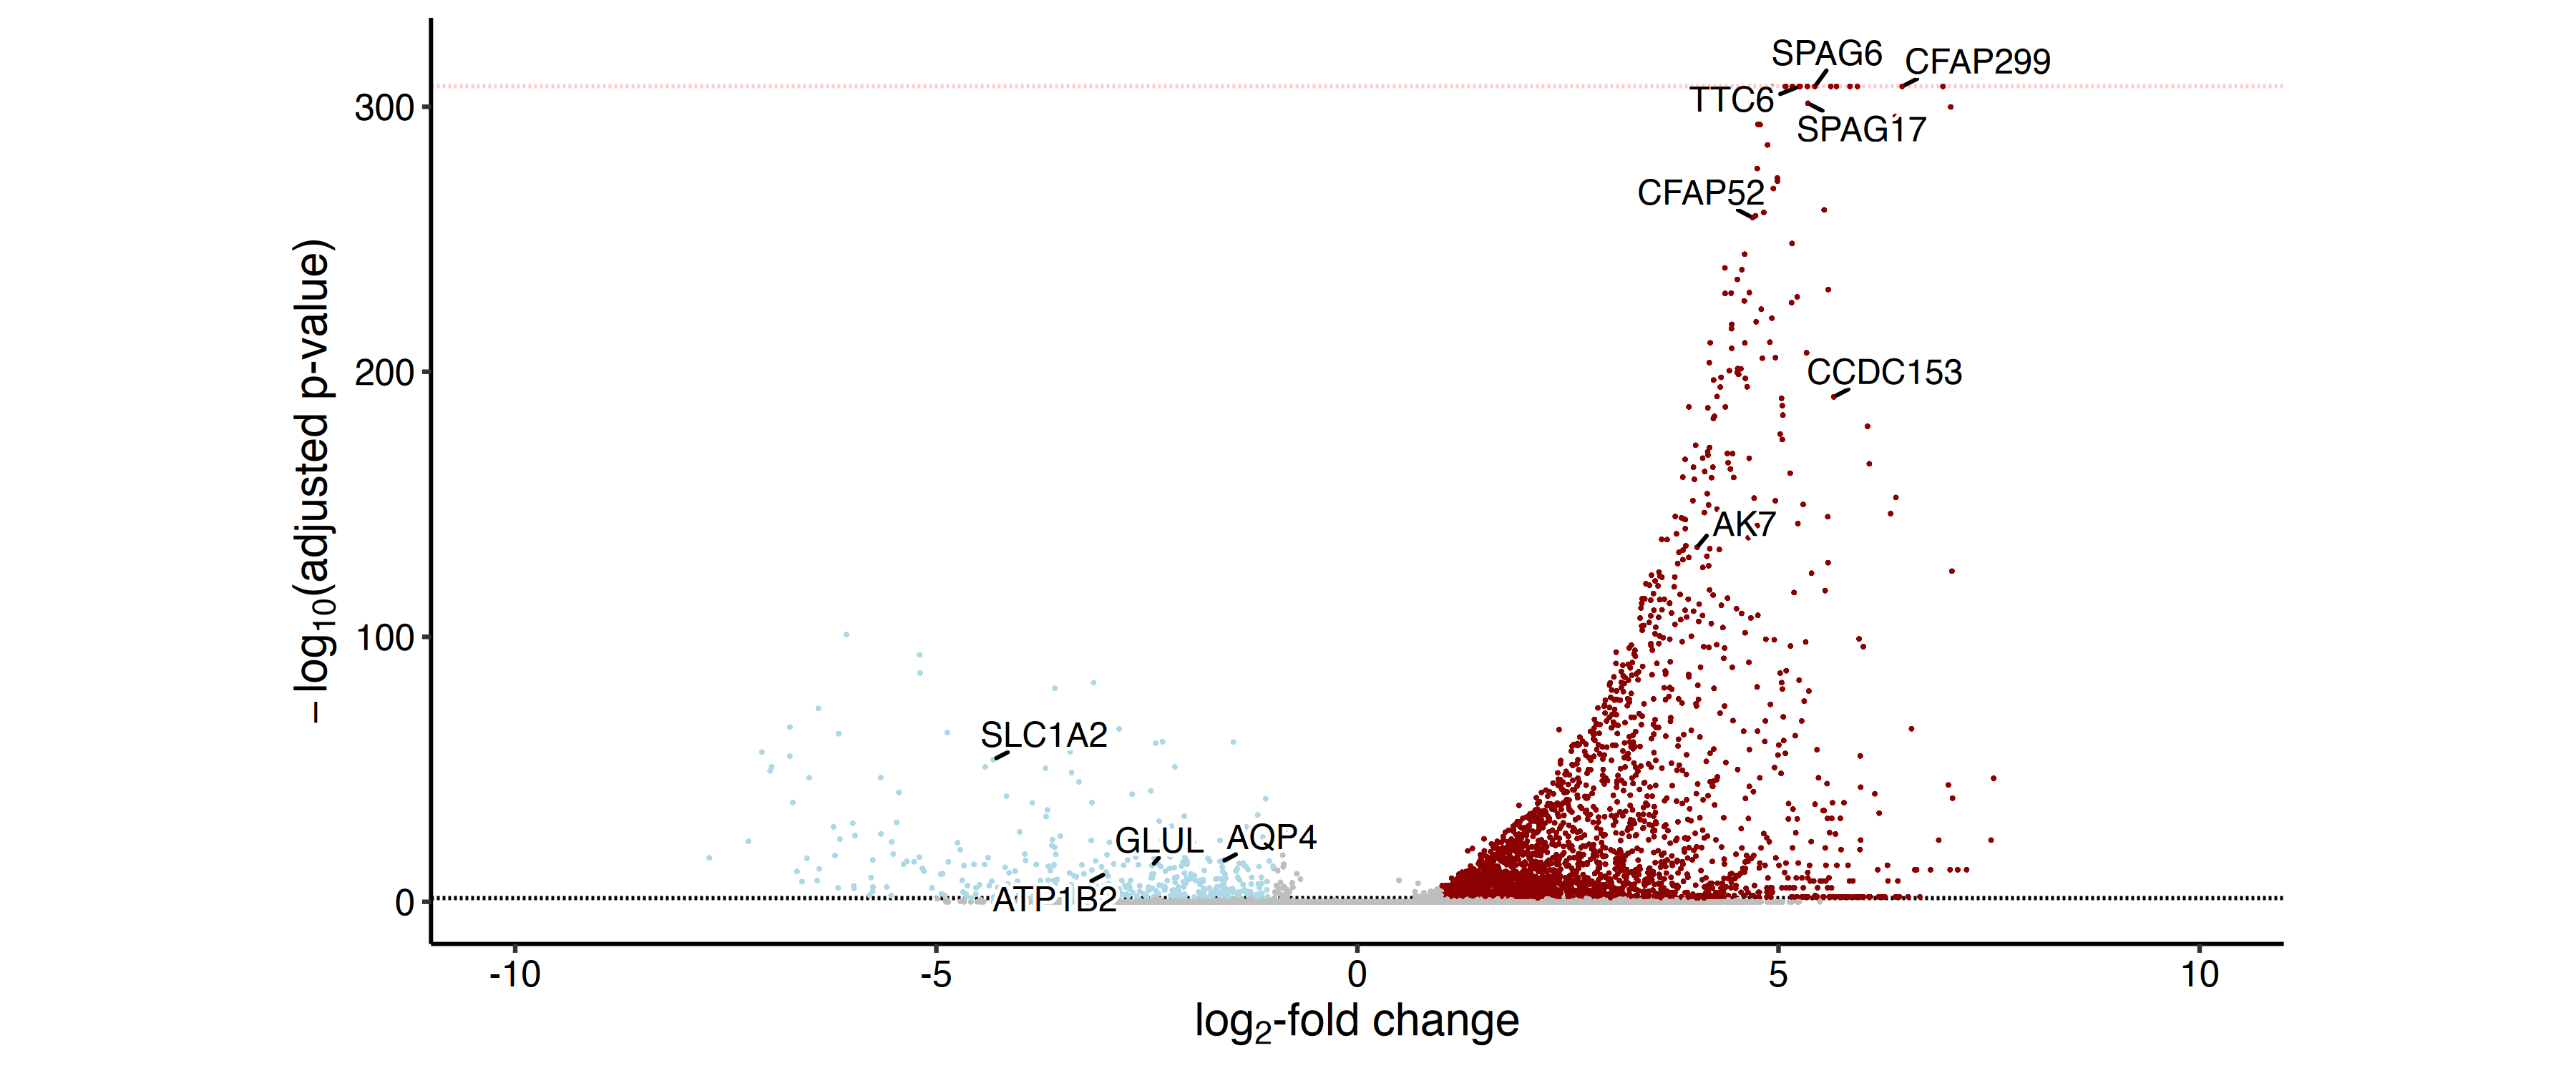

In [84]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res = 300)

highlight_genes <- c('CCDC153', 'AK7', 'CFAP299', 'CFAP156', 'SPAG6', 'TTC6', 'CFAP52', 'SPAG17',
                    'SLC1A2', 'ATP1B2', 'AQP4', 'GLUL')
image <- ggplot(data = presto_results %>% filter(cluster == "8") %>% mutate(label = ifelse(feature %in% highlight_genes, feature, NA)) %>% 
                                                                         mutate(significance = ifelse((p_val_adj < 0.05) & (log2FC > 1), "Up", 
                                                                                              ifelse((p_val_adj < 0.05) & (log2FC < -1), "Down",
                                                                                                    "NS"))), 
       aes(x = log2FC, y = -log10(p_val_adj), label = label, color = significance)) +
  geom_hline(yintercept = -log10(0.05), col = "black", linetype = 'dashed') + 
  rasterize(geom_point(size = 0.1), dpi = 1200) + 
    labs(x = expression(paste(log[2],"-fold change")), y = expression(paste(-log[10], "(adjusted p-value)"))) + 
    scale_color_manual(values = c('lightblue', 'gray', 'darkred'), guide = NULL) + 
     geom_text_repel(max.overlaps = Inf, segment.color = "black",
                    nudge_y = 2, min.segment.length = 0, 
                     fontface = 'italic',
                    bg.color = "white",
                     color = "black",
                     size = 4,
                    bg.r = .15) + 
    ylim(0, -log10(.Machine$double.xmin)+10) + 
    xlim(-10, 10) + 
    geom_hline(yintercept = -log10(.Machine$double.xmin), col = "red", linetype = 'dashed', alpha = 0.2) + 
    theme_pubr() + 
  theme(
              axis.title.y = element_text(size = 15),
              axis.title.x = element_text(size=15),
      aspect.ratio = 0.5
            )

ggsave(file="outputs/figures/human_rebuttal_cluster8_markers_volcanoplot.svg", plot=image, width=12, height=5, dpi = 600)

image

options(warn = 0)

We can see that this cluster expresses characteristic markers of ependymal cells, and has decreased expression of astrocyte marker genes.

Let's check how many cells are coming from each sample:

In [85]:
samples_df = data.frame('sample' = human_subset$sample_number, 'condition' = human_subset$pathology)
samples_df = samples_df[!duplicated(samples_df),]
rownames(samples_df) <- samples_df$sample
counts_df = as.data.frame(table(human_subset$rebuttal_cluster, human_subset$sample_number)[9,])
colnames(counts_df) <- 'counts'
counts_df = merge(samples_df, counts_df, by = 0, all = TRUE)
counts_df$condition <- factor(counts_df$condition, levels = c('control_white_matter', 'MS_periplaque_white_matter', 'MS_lesion_core', 'chronic_inactive_MS_lesion_edge', 'chronic_active_MS_lesion_edge'))
counts_df

Row.names,sample,condition,counts
<I<chr>>,<chr>,<fct>,<int>
1,1,chronic_active_MS_lesion_edge,0
1_SRR9123033,1_SRR9123033,chronic_active_MS_lesion_edge,0
1_SRR9123034,1_SRR9123034,control_white_matter,0
1_SRR9123035,1_SRR9123035,control_white_matter,0
1_SRR9123038,1_SRR9123038,control_white_matter,0
1_SRR9123039,1_SRR9123039,control_white_matter,0
1_SRR9123041,1_SRR9123041,control_white_matter,0
1_SRR9123042,1_SRR9123042,chronic_inactive_MS_lesion_edge,0
1_SRR9123044,1_SRR9123044,chronic_active_MS_lesion_edge,0


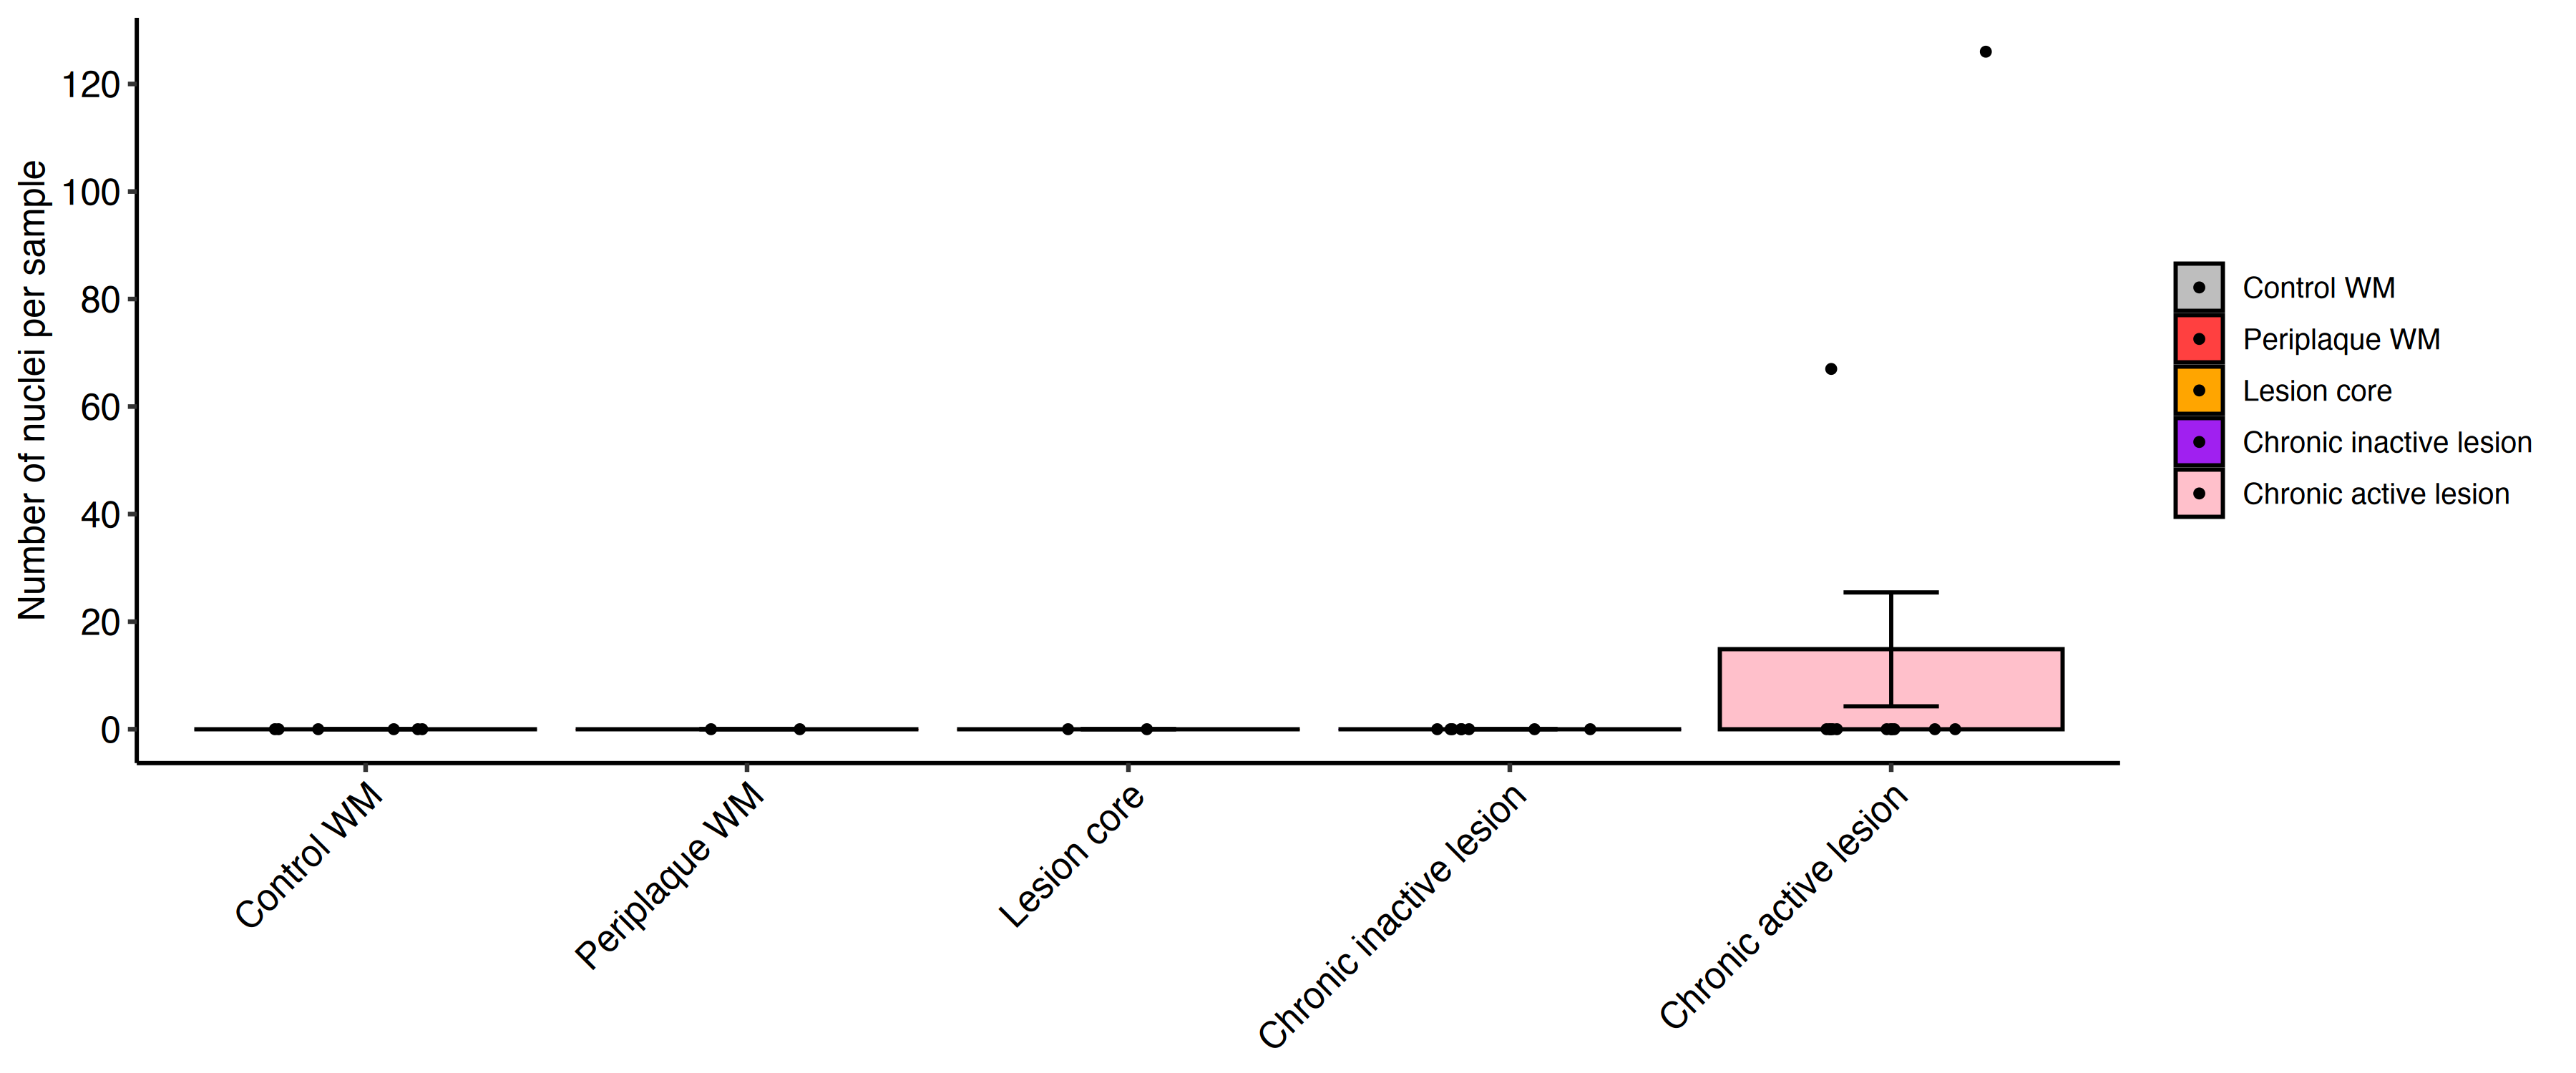

In [86]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res = 300)

summary_data <- counts_df %>% group_by(condition) %>% summarise(mean_value = mean(counts), sem_value = sd(counts)/sqrt(n()))

image <- ggplot(summary_data, aes(x = condition, y = mean_value, fill = condition, color = condition)) +
    geom_bar(stat = 'identity', color = 'black') + 
    geom_errorbar(data = summary_data, aes(x = condition, ymin = mean_value - sem_value, ymax = mean_value + sem_value),
               width = 0.25, color = 'black') + 
    scale_color_manual(values = c('black', 'black', 'black', 'black', 'black')) + 
    scale_fill_manual(values = c('gray', 'brown1', 'orange', 'purple', 'pink'), labels = c('Control WM', 'Periplaque WM', 'Lesion core', 'Chronic inactive lesion', 'Chronic active lesion')) + 
    geom_jitter(data = counts_df, aes(x = condition, y = counts), position = position_jitter(width = 0.25, height = 0), size = 1, color = 'black') + 
    scale_y_continuous(breaks=scales::pretty_breaks()) +
    scale_x_discrete(labels = c('Control WM', 'Periplaque WM', 'Lesion core', 'Chronic inactive lesion', 'Chronic active lesion')) + 
    labs(x = NULL, y = 'Number of nuclei per sample', fill = NULL) + 
    guides(color = 'none') + 
    theme_pubr() + 
    theme(legend.position = 'right', axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

ggsave(file="outputs/figures/human_rebuttal_cells_per_sample.svg", plot=image, width=6, height=4, dpi = 600)

image

We can see that this small cluster is entirely composed of cells from just two samples. This is poor evidence for a robust memory astrocyte state. 

In summary:

1. The claim that the epigenetic memory astrocyte phenotype survives non-astrocyte cell type removal and quality control filtering is untrue. 75% of the nuclei originally labeled as epigenetic memory astrocytes were removed by Lee et al themselves in their rebuttal. **Not a single nucleus from the original 964 nucleus epigenetic memory astrocyte cluster was also labeled as epigenetic memory astrocytes by Lee et al's rebuttal analysis**.
2. The new epigenetic memory astrocyte cluster (Cluster8) identified by Lee et al does not have significantly elevated up-signature and FIND-seq signature enrichment scores compared to several other clusters.
3. The new epigenetic memory astrocyte cluster (Cluster 8) only appreciably expresses 2 genes (**PTPRE** & **C8orf34**) from the 71 orthologous gene corrected up-signature, and neither of these genes are specific to Cluster 8. The up-signature enrichment scores of Cluster 8 are entirely driven by slightly elevated expression of these two genes compared to other clusters.
4. The new epigenetic memory astrocyte cluster (Cluster 8) appears to by comprised of ependymal cells based on marker gene expression.
5. The new epigenetic memory astrocyte cluster is composed of a small number cells derived from just 2 samples. This is poor evidence for a robust astrocyte phenotype.

We conclude the authors' rebuttal is unconvincing. These issues demonstrate that the epigenetic memory astrocyte phenotype is not robust and that Lee et al's methods for identifying putative epigenetic memory astrocytes in single cell RNA sequencing data are applied arbitrarily.

In [87]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/liddelowlab/mambaforge/envs/EpiMemAstros/lib/libopenblasp-r0.3.28.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future.apply_1.11.2   future_1.34.0         IRdisplay_1.1        
 [4] svglite_2.1.3         ComplexHeatmap_2.18.0 gridExtra_2.3        
 [7] cowplot_1.1.3         ggrastr_1.0.2         ggrepel_0.9.6        
[10] presto_1.0.0          data.table_1.15.4     Rcpp_1.0.13-1        
[13] viridis_0.6.5         viridisLite_0.4.2     Nebulosa_1.12.0      
[16] patchwork_1.3.0       dplyr_1.1.4           ggsci_3.2.0          
[19] ggpubr_0.6.0          ggplot2_3.5.1      

In [88]:
version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             